# Predicting Apple Stock Trends from Apple Leaks

Idea:
Train classifier to predict stock trend for the next n days after a week, n tbd.
Input:
- Keywords / S-Bert Embedding
- leak sentiment -> Zero shot, manual validation
- financial trend
- stock price of previous day / Average Stock prive of previous Lag
- Accuracy of the Leaker -> How credible is the leak

## Introduction
The stock market has always been a subject of great interest and fascination for investors and researchers alike. Its dynamic and volatile nature, influenced by various internal and external factors, makes predicting stock trends a challenging task. However, with the advent of technology and the availability of vast amounts of data, researchers have started exploring methods to forecast stock market movements. One such method gaining attention is the prediction of stock trends based on news, or social media content (Xu & Cohen, 2018).
As one of the world's leading technology companies, Apple Inc. has a massive following of investors, enthusiasts, and analysts. This intense interest often leads to a flow of information and rumors about upcoming products, strategies, and other developments within the company. These leaks can range from information about new product features, production plans, or even strategic partnerships. While such leaks carry an element of uncertainty and may not always be accurate, they can still provide valuable insights into the future prospects of the company and thus have an influence on the company stocks. This work aims to expand ongoing research about predicting stock volatility and trends from news and social media sources to predicting stock trends of Apple Inc. based on the latest Leaks and rumors.

## Approach
First, a new dataset is created and analyzed by combining data from the Apple Leaks dataset (Apple Leaks, 2022) and the Apple Stocks Share's Data dataset (Apple Stock Share’s Data, 2023). In addition, the Apple Leaks dataset is also expanded to include additional features such as the publishing date of a Leak. Based on the newly created dataset about Apple Leaks and stocks data, machine learning classifiers such as K-Nearest Neighbour and Decision Trees, as well as Deep Learning approaches, covering simple Classification heads, as well as a transformer classifier, are trained to solve a multi-class classification task including five different classes. Each of these classes represent different types of trends and stock potential, such as:
- Neutral: No gain, No loss
- Positive: small upward trend expected
- Negative: small downward trend expected
- Significantly positive: the stock price is expected to rise significantly
- Significantly Negative: High risk of great losses expected

All approaches are evaluated on a test split of the data and compared against each other during the final part of this work.

## The Dataset
In this section, the process of creating a dataset that covers apple leaks as well as corresponding financial information is layed out. During this process, different aspects of the data are analyzed and discussed.

First, the Apple Leaks dataset is loaded and used as a foundation for the new dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

leaks_df: pd.DataFrame = pd.read_csv('./datasets/apple_leaks/Each_Leak/Each_Leak.csv')
leaks_df

,Name,Accuracy,Link of Leaker Dashboard,Description,Img,Status,Leak,Leak Link
0,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,No 11-inch Mini-LED iPad Pro in 2022,NaN
1,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,Studio Display Pro will be Mini-LED,https://appletrack.com/studio-display-pro-with...
2,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,Studio Display Pro coming in June,https://appletrack.com/studio-display-pro-with...
3,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,20-inch iPad/MacBook hybrid coming in 2025,https://appletrack.com/apple-investigating-20-...
4,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,iPhone Fold not coming until at least 2025,https://appletrack.com/no-foldable-iphone-unti...
...,...,...,...,...,...,...,...,...
1072,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,⛔️,4G iPhone 12 will cost ~$800,https://www.businessinsider.com/apple-iphone-1...
1073,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,⛔️,2020 iPhones will be announced in September,https://9to5mac.com/2020/07/13/september-launc...
1074,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,✅,2020 iPhones won’t include EarPods,https://9to5mac.com/2020/06/16/apple-analyst-n...
1075,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,⛔️,2020 iPhones will ship in “early October”,https://9to5mac.com/2020/06/16/apple-analyst-n...


As shown above, the dataset consists of a total of 1077 records with eight different attributes:
- Name: The name of the Leaker,
- Accuracy: The leakers cumulative accuracy based on every leak he reported,
- Link of Leaker Dashboard: Link to the Dashboard of the leaker on appletrack.com,
- Description: Short description of the biography of the leaker and his reputation,
- Img: Image of the leaker,
- Status: Status of the Leak. Can be one of three values: Pending, Right, False,
- Leak: Description of the leak,
- Leak Link: Source of the link.

With that, a lot of important information about a leak is available. However, the publishing date of every leak is missing. As this attribute marks the only possible point of connection between shares data, as it usually consists of a price on a specific date, and the Apple Leaks dataset, it is collected using different web scraping techniques. First, all rows which aren't fully populated are removed.

In [2]:
leaks_df.dropna(inplace=True)
leaks_df

,Name,Accuracy,Link of Leaker Dashboard,Description,Img,Status,Leak,Leak Link
1,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,Studio Display Pro will be Mini-LED,https://appletrack.com/studio-display-pro-with...
2,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,Studio Display Pro coming in June,https://appletrack.com/studio-display-pro-with...
3,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,20-inch iPad/MacBook hybrid coming in 2025,https://appletrack.com/apple-investigating-20-...
4,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,iPhone Fold not coming until at least 2025,https://appletrack.com/no-foldable-iphone-unti...
5,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,2022 iMac coming in June 2022,https://appletrack.com/revamped-imac-pro-to-la...
...,...,...,...,...,...,...,...,...
1072,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,⛔️,4G iPhone 12 will cost ~$800,https://www.businessinsider.com/apple-iphone-1...
1073,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,⛔️,2020 iPhones will be announced in September,https://9to5mac.com/2020/07/13/september-launc...
1074,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,✅,2020 iPhones won’t include EarPods,https://9to5mac.com/2020/06/16/apple-analyst-n...
1075,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,⛔️,2020 iPhones will ship in “early October”,https://9to5mac.com/2020/06/16/apple-analyst-n...


Next, the properties and distribution of Leakers in the dataset are studied. For this, the accuracy of every leaker is plotted in a bar diagram, along with the number of leaks per leaker. This gives an overview of how credible a leak might be, depending on its author. It can be seen as a measure of the inverse of the leaks uncertainty. If a Leaker has a high-accuracy score, it is likely that the leak or some aspects of it will turn out to be true. This holds in a similar fashion for leakers with a low accuracy score, for them, the uncertainty of a leak can be interpreted as high and it is thus not as credible.
The number of leaks per leaker, gives an overview of the distribution of authors in the dataset. This is important, as the credibility of leaks is tied to its author, and thus plotting the amount of leaks per author, also gives an overview about the amount of leaks which are credible.

<AxesSubplot: title={'center': 'Number of Leaks per Leaker'}>

/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128031 (\N{FISH}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 127936 (\N{BASKETBALL AND HOOP}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/IPython/

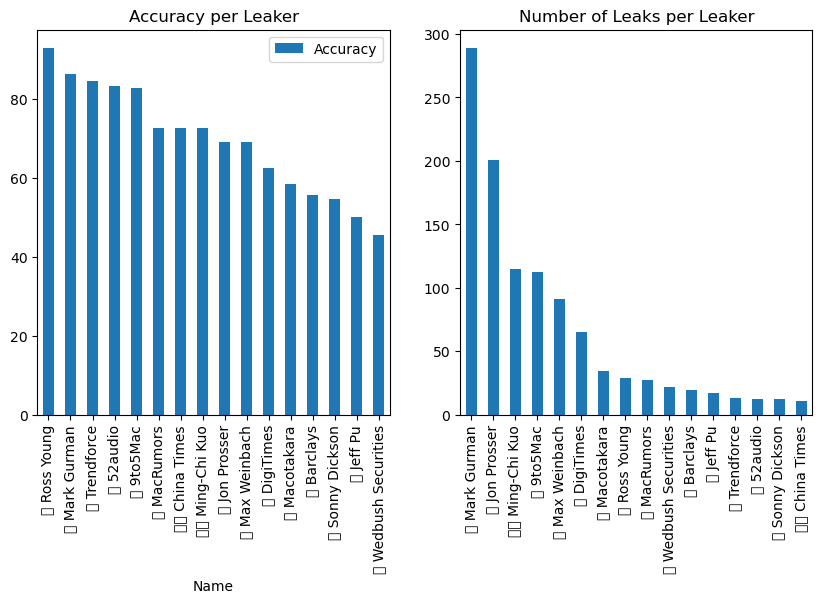

In [5]:
# Analyze Leakers in the Dataset and their credibility
fig, ax = plt.subplots(1,2, figsize=(10,5))

leaks_df['Accuracy'] = leaks_df.Accuracy.str.rstrip('%').astype(float)
leaks_df[['Accuracy', 'Name']].drop_duplicates().plot(x='Name', y='Accuracy', kind='bar', title='Accuracy per Leaker', ax=ax[0])
leaks_df.Name.value_counts().plot.bar(title='Number of Leaks per Leaker', ax=ax[1])

As shown above in the plot on the left, the most accurate leaker is Ross Young with an accuracy of 92.9%, with the most inaccurate leaker being Wedbush Securities. Overall, almost every leaker showed an accuracy of over 50%, with only 31% of Leakers having an accuracy of over 80%. The leakers with an accuracy over 80% can be seen as highly credible.
As shown in the plot on the right, the Leakers with the highest accuracy scores are not necessarily the ones with the most number of leaks. Some have high leak counts such as Mark Gurman, which tops the charts with over 250 Leaks, whereas Ross Young, ranks somewhere in the midfield and has almost the same amount of publications as Wedbush Securities. Overall, most leaks have a high credibility in terms of the accuracy of their authors.

Next, the amount of leaks per source is analyzed, in order to find a suitable threshold, that removes as many sources from the dataset as possible, while minimizing the amount of records, which will be removed. This step is necessary, as writing a scraper for a particular plattform is a lot of work depending on its architecture. As a result, the amount of sources which will be scraped has to be limited in order to reduce the workload to keep it feasible in the context of the industrial applications of ai course. To achieve this, the domain of every source is extracted from the Leak Link column using regular expressions and its value counts are plotted.

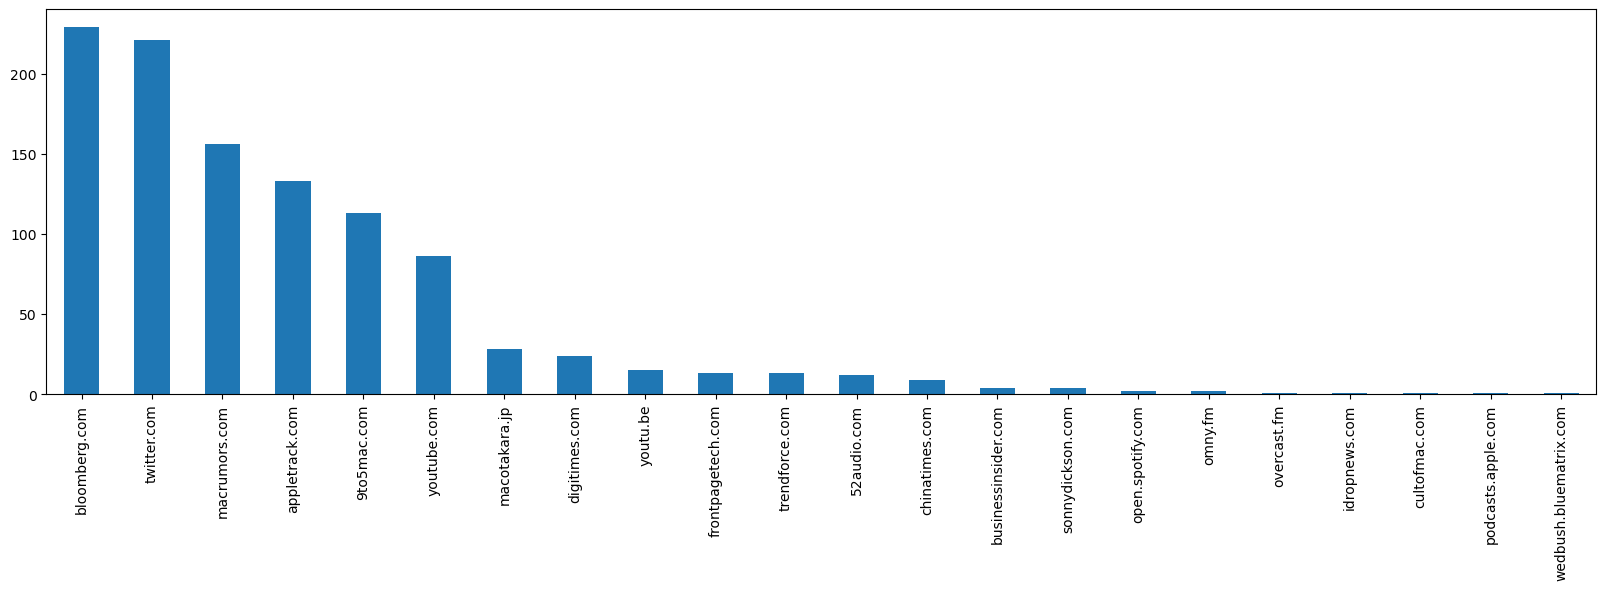

In [3]:
# Analyze the amount of leaks per plattform to identify the most important ones and reduce the amount of scraping that needs to be done
import re
leaks_df["domain"] = leaks_df["Leak Link"].apply(lambda x: re.search(r'(?:https?://|^)([^/]+)', str(x)).group(0).replace("https://", "").replace("www.", "").replace("http://", ""))
leaks_df["domain"].value_counts().plot.bar(figsize=(20,5))
plt.xticks(rotation='vertical')
plt.show()

As shown above, approximately 80% of Leaks originate from six out of 22 platforms. All of these platforms, except YouTube.com, published over 100 Leaks in total. As a result, removing any other of the remaining 16 platforms only results in a small reduction of samples. Even in total, removing every source which has less than 100 publications results in a loss of around 200 records out of 1069 or around 20%. This greatly reduces the number of webscrapers needed while having a mediocre impact on the number of available records. The inclusion of youtube could have mitigated the number of lost records further, however, scraping YouTube is infeasible because of their extensive scraping protections and their API is only accessible through a Google Account and poses strict quota limits.

In [4]:
# Filter all domains which have < 100 occurences
domains_to_keep = leaks_df.domain.value_counts()[leaks_df.domain.value_counts() >= 100]
leaks_df = leaks_df[leaks_df.domain.isin(domains_to_keep.index)]
leaks_df

,Name,Accuracy,Link of Leaker Dashboard,Description,Img,Status,Leak,Leak Link,domain
1,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,Studio Display Pro will be Mini-LED,https://appletrack.com/studio-display-pro-with...,appletrack.com
2,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,Studio Display Pro coming in June,https://appletrack.com/studio-display-pro-with...,appletrack.com
3,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,20-inch iPad/MacBook hybrid coming in 2025,https://appletrack.com/apple-investigating-20-...,appletrack.com
4,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,iPhone Fold not coming until at least 2025,https://appletrack.com/no-foldable-iphone-unti...,appletrack.com
5,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,2022 iMac coming in June 2022,https://appletrack.com/revamped-imac-pro-to-la...,appletrack.com
...,...,...,...,...,...,...,...,...,...
1067,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,✅,"AirTags will be released at April 20, 2021",https://www.macrumors.com/2021/04/19/wedbush-e...,macrumors.com
1068,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,⛔️,"AirPods 3 will be teased at April 20, 2021 event",https://www.macrumors.com/2021/04/19/wedbush-e...,macrumors.com
1073,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,⛔️,2020 iPhones will be announced in September,https://9to5mac.com/2020/07/13/september-launc...,9to5mac.com
1074,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,✅,2020 iPhones won’t include EarPods,https://9to5mac.com/2020/06/16/apple-analyst-n...,9to5mac.com


Now that the dataset has been reduced to include only sources with over 100 publications, reducing the amount of sources to be scraped to five, the corresponding scrapers can be developed. First off, I started with examining every website using the developer tools of the browser of my choice. Depending on the website, Chrome or Safari have been used. In particular, the part of the HTML code that included the publishing date of the corresponding article has been extracted. Which was used to compose regular expressions to match the publishing date based on its context in the retrieved HTML document. This approached worked well for appletrack.com, 9to5mac.com and macrumors.com. However, twitter and bloomberg turned out to be dynamically rendered Javascript based websites, which do not send a static HTML document filled with the requested information. Instead, they send JavaScript Files which are executed by the browser to dynamically retrieve information and render the website. As a result, regex matching wasn't applicable. Instead, a headless browser engine such as playwright has to be used, which is able to render the website in the background. These browser engines can be automated using their corresponding programming interfaces. These automation capabilities can be used to navigate a website or to analyze its behavior. First, playwright uses the chromium browser, to initialize a new browser context and opens the source link from the dataset. In the case of twitter, it then monitors the websites requests, to retrieve the TweetDetail response, which includes all the information about the tweet which should be displayed, such as: publishing date, tweet content, author, likes, retweets, comments etc. As the response is in JSON format, the publishing date can be extracted using a nested lookup. For Bloomberg, this approach doesn't work, as Bloomberg does not load its data in a similar fashion. In fact, I couldn't find a suitable request to exploit, and thus, the playwright has to load the website, wait until it is fully loaded and rendered and then return the websites dynamically rendered HTML document. This document can then again be processed using a regular expression that extracts the corresponding date. However, Bloomberg and Twitter both started to block requests immediately in headless mode and after 4 to 5 requests in non-headless mode. Thus, randomized sleep timers have been added to mimic a user reading the actual article. Unfortunately, it turned out that this isn't sufficient to trick their scraping protections. As a result, the VPN Server network Nord VPN has been used to rotate between all 5700+ Servers (Best VPN Server Selection in 2023 | NordVPN, 2015) every five requests. This measure turned out to be sufficient to scrape the publishing dates from Bloomberg and Twitter.

As these scripts are quite long and don't work inside of Jupyter, they are included in the project folder as separate scripts and called using the subprocess module below.

In [ ]:
"apple_track": "article:published_time" content="2022-03-10T07"
"twitter": "<time datetime="2022-01-31T18:20:18.000Z">7:20 pm · 31 Jan 2022</time>"
"bloomberg": "<time itemprop="datePublished" datetime="2022-01-30T14:45:12.893Z" data-locale="en">30 January 2022 at 15:45 CET</time>"
"9to5mac": "article:published_time" content="2021-04-05T23:"
"macrumors": "<time datetime="2020-03-19T08:19:54-07:00">Thursday March 19, 2020 8:19 am PDT</time>"

In [5]:
from tqdm import tqdm
import subprocess
from typing import List, Tuple
from datetime import datetime
import requests

# scrape dates from all websites
def extract_dates_via_html():
    """
    Scrapes Publishing dates using regular expressions directly from the retrieved HTML code,
    Only works on standard HTML websites
    :return: pd.Dataframe of scraped dates
    """
    rgxs = {
        "appletrack.com": r'(?:published_time" content=")(\d{4}-\d{2}-\d{2})',
        "9to5mac.com": r'(?:published_time" content=")(\d{4}-\d{2}-\d{2})',
        "macrumors.com": r'(?:<time datetime=")(\d{4}-\d{2}-\d{2})',
    }

    links = leaks_df[["Leak Link", "domain"]][(leaks_df["domain"] != "twitter.com") & (leaks_df["domain"] != "bloomberg.com")].drop_duplicates() # remove duplicate entrys in the link list
    res: List[Tuple[str, datetime]] = []

    # retrieve and match html
    for idx, row in tqdm(links.iterrows()):
        html = requests.get(row["Leak Link"]).content
        match = re.search(rgxs[row["domain"]], str(html)).groups()[0]
        res.append((row["Leak Link"], datetime.strptime(match, '%Y-%m-%d')))

    # cast results to dataframe and save to disk
    res_df = pd.DataFrame(res, columns=["url", "datetime"])
    res_df.to_csv("./datasets/scraped_html_dates.csv", index=False)
    return res_df

def extract_dates_twitter():
    """
    Uses the scrape_date_from_twitter.py script, which uses a "headless" Browser to open a twitter link,
    Monitors its Datarequests and extracts the publishing date. In addition, the script uses the NordVPN Network with over 5500
    Servers to obfuscate its scraping activity by switching between servers and countries every 5 requests. This bypasses twitters scraping
    protection.
    :return: pd.Dataframe of scraped dates
    """
    links: List = leaks_df["Leak Link"][leaks_df["domain"] == "twitter.com"].drop_duplicates().tolist()
    subprocess.run(["python", "scrape_date_from_twitter.py"] + links)
    twitter_dates = pd.read_csv("datasets/scraped_twitter_dates.csv")
    return twitter_dates

def extract_dates_bloomberg():
    """
    Similar to twitter but adapted to Bloomberg specific problems
    :return: pd.Dataframe of scraped dates
    """

    links: List = leaks_df["Leak Link"][leaks_df["domain"] == "bloomberg.com"].drop_duplicates().tolist()
    subprocess.run(["python", "scrape_data_from_bloomberg.py"] + links)
    bloomberg_dates = pd.read_csv("datasets/scraped_bloomberg_dates.csv")
    return bloomberg_dates

# concatenate all dates into a dataframe
extracted_html = extract_dates_via_html()
extracted_twitter = extract_dates_twitter()
extracted_bloomberg = extract_dates_bloomberg()
all_dates = pd.concat([
    extracted_html,
    extracted_twitter,
    extracted_bloomberg
])
all_dates

,url,datetime
0,https://twitter.com/DSCCRoss/status/1488215580...,2022-01-31 18:20:18+00:00
1,https://twitter.com/DSCCRoss/status/1481306555...,2022-01-12 16:46:18+00:00
2,https://twitter.com/DSCCRoss/status/1483106901...,2022-01-17 14:42:34+00:00
3,https://twitter.com/DSCCRoss/status/1450684151...,2021-10-20 04:43:48+00:00
4,https://twitter.com/DSCCRoss/status/1447980008...,2021-10-12 17:34:12+00:00
...,...,...
49,https://www.bloomberg.com/news/articles/2020-0...,2020-04-16
50,https://www.bloomberg.com/news/articles/2020-0...,2020-04-13
51,https://www.bloomberg.com/news/articles/2020-0...,2020-03-30
52,https://www.bloomberg.com/news/articles/2020-0...,2020-02-20


In [5]:
extracted_html = pd.read_csv("datasets/scraped_html_dates.csv")
extracted_bloomberg = pd.read_csv("datasets/scraped_bloomberg_dates.csv")
extracted_twitter = pd.read_csv("datasets/scraped_twitter_dates.csv")

all_dates = pd.concat([
    extracted_html,
    extracted_twitter,
    extracted_bloomberg
])
all_dates

,url,datetime
0,https://appletrack.com/studio-display-pro-with...,2022-03-10
1,https://appletrack.com/apple-investigating-20-...,2022-02-21
2,https://appletrack.com/no-foldable-iphone-unti...,2022-02-21
3,https://appletrack.com/revamped-imac-pro-to-la...,2022-02-14
4,https://appletrack.com/gurman-mac-studio-and-n...,2022-03-07
...,...,...
49,https://www.bloomberg.com/news/articles/2020-0...,2020-04-16
50,https://www.bloomberg.com/news/articles/2020-0...,2020-04-13
51,https://www.bloomberg.com/news/articles/2020-0...,2020-03-30
52,https://www.bloomberg.com/news/articles/2020-0...,2020-02-20


Now that all publishing dates have been scraped, they are merged into the original dataset.

In [6]:
# Add dates to dataset and remove unnecessary columns
leaks_df = pd.merge(left=leaks_df, right=all_dates, left_on="Leak Link", right_on="url")
leaks_df.drop(columns=["url", "Img", "Description", "Link of Leaker Dashboard"], inplace=True)
leaks_df.dropna(inplace=True)
leaks_df

,Name,Accuracy,Status,Leak,Leak Link,domain,datetime
0,🐟 Ross Young,92.9%,⏳,Studio Display Pro will be Mini-LED,https://appletrack.com/studio-display-pro-with...,appletrack.com,2022-03-10
1,🐟 Ross Young,92.9%,⏳,Studio Display Pro coming in June,https://appletrack.com/studio-display-pro-with...,appletrack.com,2022-03-10
2,🐟 Ross Young,92.9%,⏳,20-inch iPad/MacBook hybrid coming in 2025,https://appletrack.com/apple-investigating-20-...,appletrack.com,2022-02-21
3,🐟 Ross Young,92.9%,⏳,iPhone Fold not coming until at least 2025,https://appletrack.com/no-foldable-iphone-unti...,appletrack.com,2022-02-21
4,🐟 Ross Young,92.9%,⏳,2022 iMac coming in June 2022,https://appletrack.com/revamped-imac-pro-to-la...,appletrack.com,2022-02-14
...,...,...,...,...,...,...,...
847,🌳 Wedbush Securities,45.4%,✅,"AirTags will be released at April 20, 2021",https://www.macrumors.com/2021/04/19/wedbush-e...,macrumors.com,2021-04-19
848,🌳 Wedbush Securities,45.4%,⛔️,"AirPods 3 will be teased at April 20, 2021 event",https://www.macrumors.com/2021/04/19/wedbush-e...,macrumors.com,2021-04-19
849,🌳 Wedbush Securities,45.4%,⛔️,2020 iPhones will be announced in September,https://9to5mac.com/2020/07/13/september-launc...,9to5mac.com,2020-07-13
850,🌳 Wedbush Securities,45.4%,✅,2020 iPhones won’t include EarPods,https://9to5mac.com/2020/06/16/apple-analyst-n...,9to5mac.com,2020-06-16


Next, the amount of Leaks per publishing date is analyzed.

<AxesSubplot: title={'center': 'Information extracted per Leak'}>

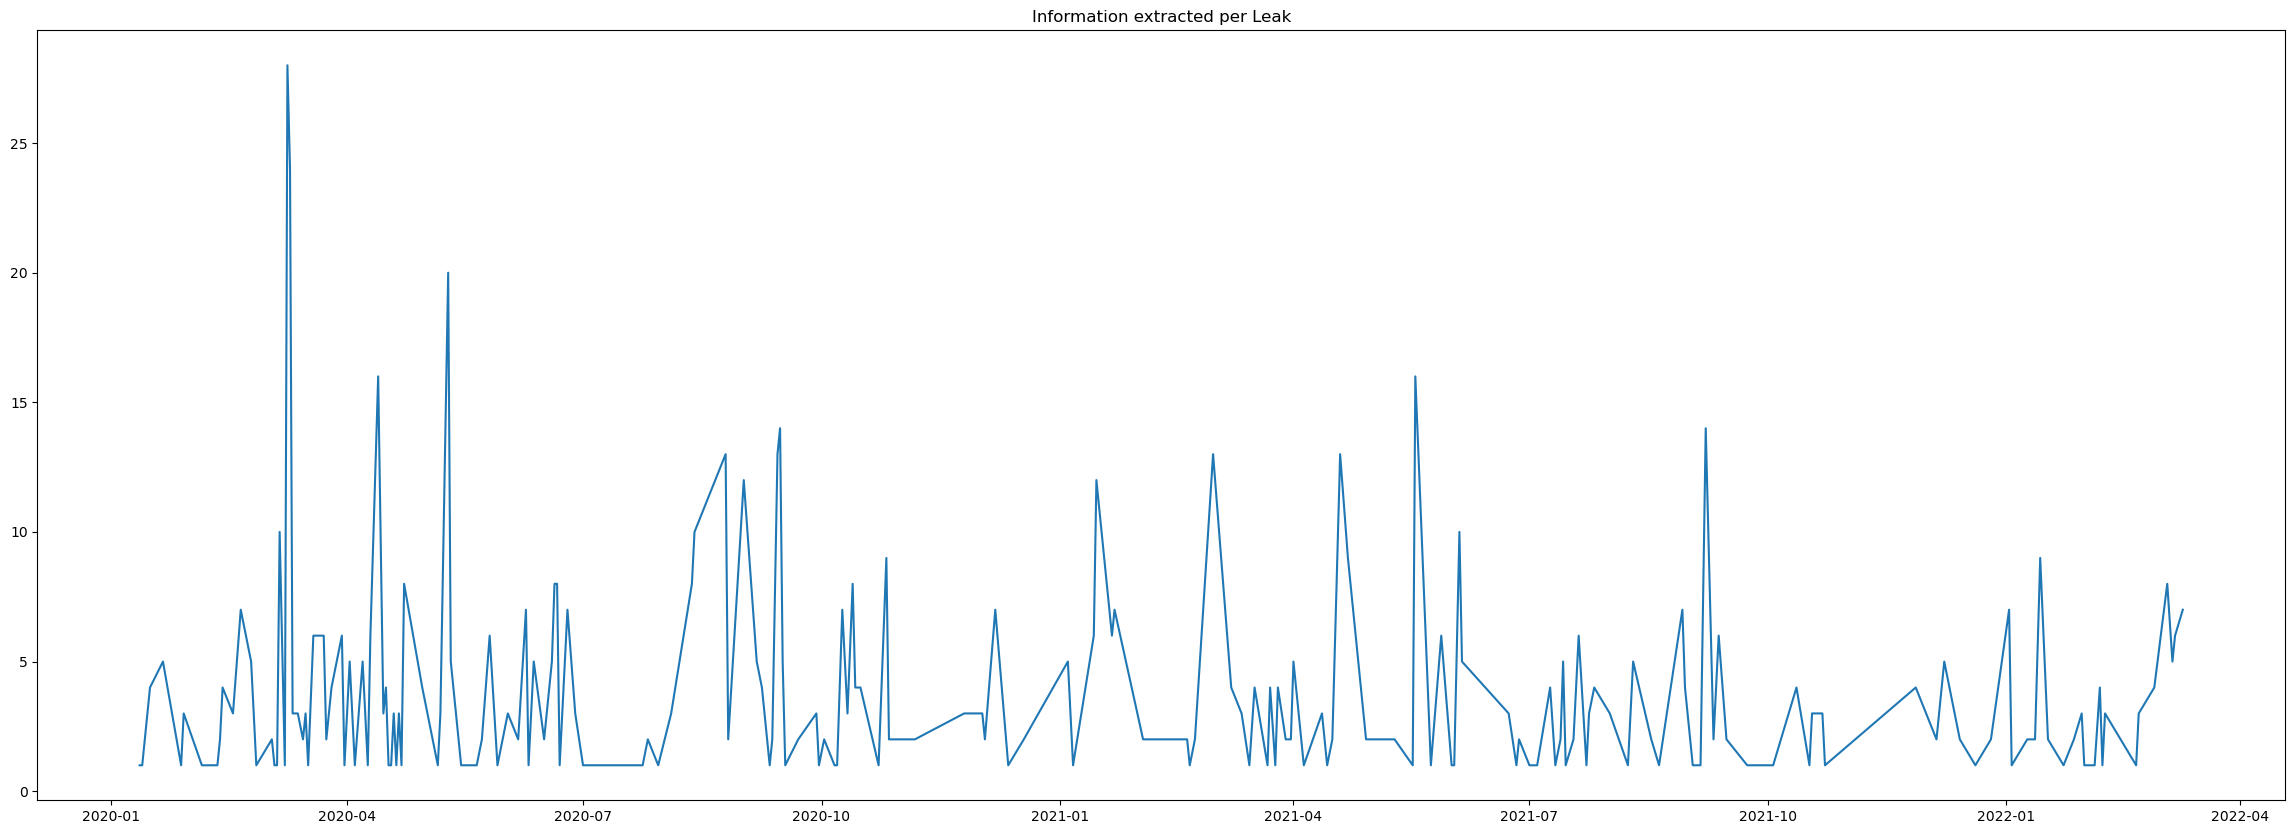

In [7]:
# Leaks per day, Multiple Leaks can originate from the same Leak source
leaks_df.datetime = pd.to_datetime(leaks_df.datetime, utc=True)
leaks_df.datetime = leaks_df.datetime.dt.date
leaks_df.datetime.value_counts().sort_index().plot(figsize=(29,10), title="Information extracted per Leak")

As shown above, multiple Leaks are released every day. This can have different origins, for some dates, multiple articles are published reporting about different leaks and one leak article can include multiple leaks. This shows, that the trend of the stock price might not be influenced by one specific leak but by a combination of leaks. One leak could be significant, while others of the same day might be irrelevant or they could all be equally relevant. Modelling this dependency increases the model complexity significantly, and thus it has been decided to simplify this relationship and treat every leak individually. This is a downside of the chosen approach, as relationships between leaks on the same day aren't captured.

## The Stock Data
Now that the Apple Leaks data has been processed and extended, the stocks data can be added.
First, the Apple Stocks Share's Data dataset is loaded and its index is set correctly to a datetime object.

In [11]:
# Read in Apple Stocks dataset
stocks_df = pd.read_csv("datasets/APPLE_STOCK_Final.csv")
stocks_df.Date = pd.to_datetime(stocks_df.Date)
stocks_df.set_index(stocks_df.Date, inplace=True, drop=True)
stocks_df.drop(columns='Date', inplace=True)
stocks_df

,Price,Open,High,Low,Volume
Date,,,,,
2023-05-12,172.57,173.62,174.06,171.00,45530000
2023-05-11,173.75,173.85,174.59,172.17,49510000
2023-05-10,173.55,173.02,174.03,171.90,53720000
2023-05-09,171.77,173.05,173.54,171.60,45330000
2023-05-08,173.50,172.48,173.85,172.11,55960000
...,...,...,...,...,...
1980-12-18,0.12,0.12,0.12,0.12,73450000
1980-12-17,0.12,0.12,0.12,0.12,86440000
1980-12-16,0.11,0.11,0.11,0.11,105730000


As shown above, the data consists of 10627 records with five different attributes, most notably the date and price of one share. The course of the apple stock covered in this dataset is plotted below.

<AxesSubplot: xlabel='Date'>

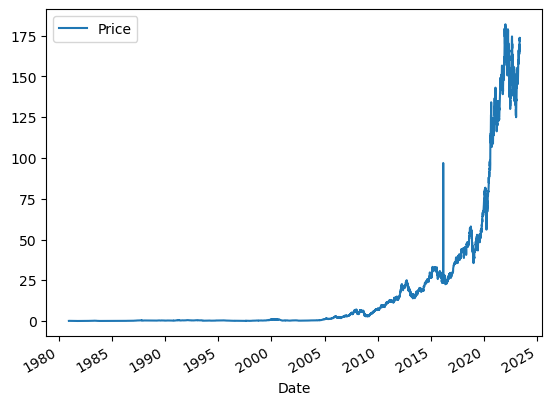

In [12]:
stocks_df.plot(y='Price')

As shown above, the data covers the complete stock development of Apple Inc. from its stock exchange listing until present day. It can also be observed that the stock has risen significantly over the years. However, this date range is far too large and isn't covered by the Apple Leaks data. In fact, the Apple Leaks data covers only the range from January 2020 until April 2022. Thus, large portions of the stock data aren't of interest for this work. Therefore, the dataset is trimmed to the timeframe matching the Apple Leaks dataset and its course is plotted again.

<AxesSubplot: title={'center': 'Development of the share price in the timeframe given by the apple leaks dataset'}, xlabel='Date'>

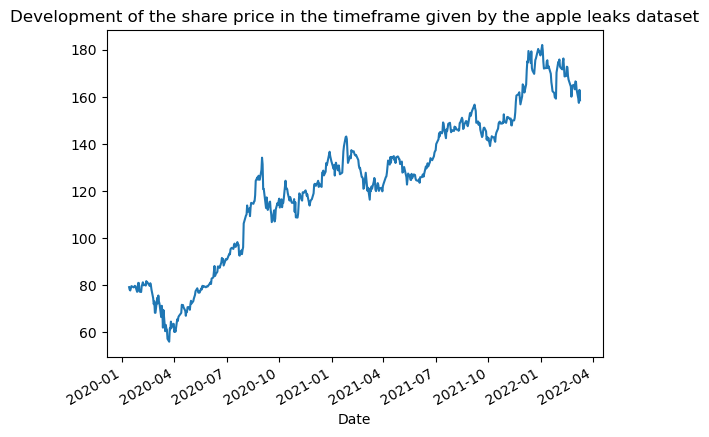

In [13]:
# Trim the data to the range we have leaks for
filtered_stocks = stocks_df[(stocks_df.index >= pd.to_datetime(leaks_df.datetime.min())) & (stocks_df.index <= pd.to_datetime(leaks_df.datetime.max()))].Price
filtered_stocks.plot(title='Development of the share price in the timeframe given by the apple leaks dataset')

As shown above, the stock price did rise over the course of the covered data. However, now that it is limited to a specific timeframe, its volatility can also be observed. It isn't steadily rising, it also has its moments where it fell, e.g. the beginning of 2020. Of course, the events leading to the observable trends covered in the stock price data aren't just based on leaks, especially in the covered timeframe, as the world was fighting against the covid-19 crisis. However, this is not part of this work. The main goal of this work is to predict the stock trends based on apple leaks. If these Leaks do not pose a suitable feature for predicting stock trends, the corresponding metrics will be quite low, as the model couldn't find any relationships between the data and the assigned classes.

Now in order to compress the information included in the course of the stock, the trend before a leak will be computed. By doing so, the course of the stock market doesn't need to be fed to the model; instead, it receives one feature, which poses a summary of the previous stock price developments. To decide how big the previous time frame should be, which is used to compute the trend value, the autocorrelation plot of the stock price data is analyzed. This plot, shows all significant lags of the data and with that shows which data points are most influential for the current one.

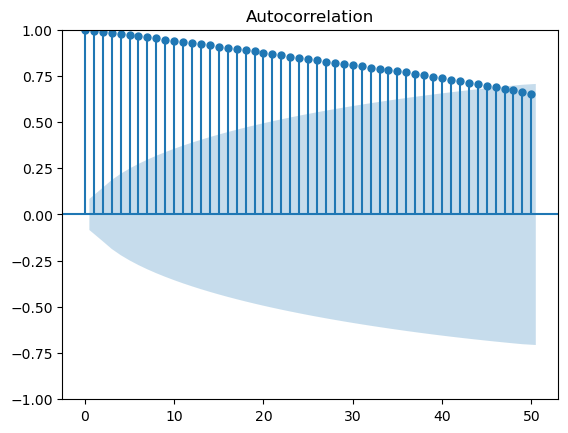

In [12]:
from statsmodels.graphics.tsaplots import plot_acf

# Autocorrelation to identify suitable lags
plot_acf(filtered_stocks, lags=50);

As shown above, every lag until 40 days is considered significant, and for every lag that is further away from the current data point, its correlation value is steadily decreasing. Because of that, it has been decided to use a lag size of 7 days, as its correlation values haven't degraded as much as for other options, simultaneously, it yields a miningful basis to compute a trend value from, as it includes enough samples, while staying in a local temporal context.

In the following 4 randomly sampled examples of stock behaviour around a leak is shown.

In [14]:
# Compose dataset of stock data before and after each leak
samples = leaks_df.groupby('Name').sample(1)
samples = samples.sort_values('Accuracy', ascending=False)
samples

,Name,Accuracy,Status,Leak,Leak Link,domain,datetime
19,🐟 Ross Young,92.9,✅,2021 iPad mini won’t have a home button,https://twitter.com/DSCCRoss/status/1419728325...,twitter.com,2021-07-26
275,🏀 Mark Gurman,86.4,✅,Apple Card gaining interest-free payments for ...,https://www.bloomberg.com/news/articles/2020-0...,bloomberg.com,2020-06-06
414,🕘 9to5Mac,82.8,✅,2020 iPad Pro will have ToF 3D sensor (LiDAR),https://9to5mac.com/2020/03/10/ios-14-iphone-9...,9to5mac.com,2020-03-10
444,❓ MacRumors,72.7,✅,iOS 14 Messages can @mention,https://www.macrumors.com/2020/03/09/imessage-...,macrumors.com,2020-03-09
455,🇨🇳 China Times,72.7,⛔️,New iMac will be powered by A14T processor,https://appletrack.com/redesigned-imac-may-fea...,appletrack.com,2020-10-27
506,👨‍💻 Ming-Chi Kuo,72.5,⏳,2022 iPhones will have no notch but punch hole...,https://appletrack.com/2022-iphone-may-remove-...,appletrack.com,2021-03-01
745,🍍 Max Weinbach,69.0,✅,iOS 14 will have “new designs and graphics”,https://twitter.com/PineLeaks/status/123592689...,twitter.com,2020-03-06
653,🧻 Jon Prosser,69.0,✅,2020 iMac releasing at 10am PST,https://twitter.com/jon_prosser/status/1290663...,twitter.com,2020-08-04
785,🔢 DigiTimes,62.5,✅,mmWave 5G iPad Pro in development,https://www.macrumors.com/2020/01/14/5g-ipad-p...,macrumors.com,2020-01-14
787,🧭 Macotakara,58.5,⛔️,2020 iPhones will support IEEE 802.11ay Wi-Fi,https://www.macrumors.com/2020/02/24/2020-ipho...,macrumors.com,2020-02-24


In [15]:
def calculate_trend(data: pd.DataFrame) -> pd.DataFrame:
    x = np.arange(len(data))
    slope, intercept = np.polyfit(x=x, y=data.Price.to_list(), deg=1)
    data['trend'] = slope * x + intercept
    return data, slope, intercept

/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128031 (\N{FISH}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 127936 (\N{BASKETBALL AND HOOP}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/IPython/core/pyla

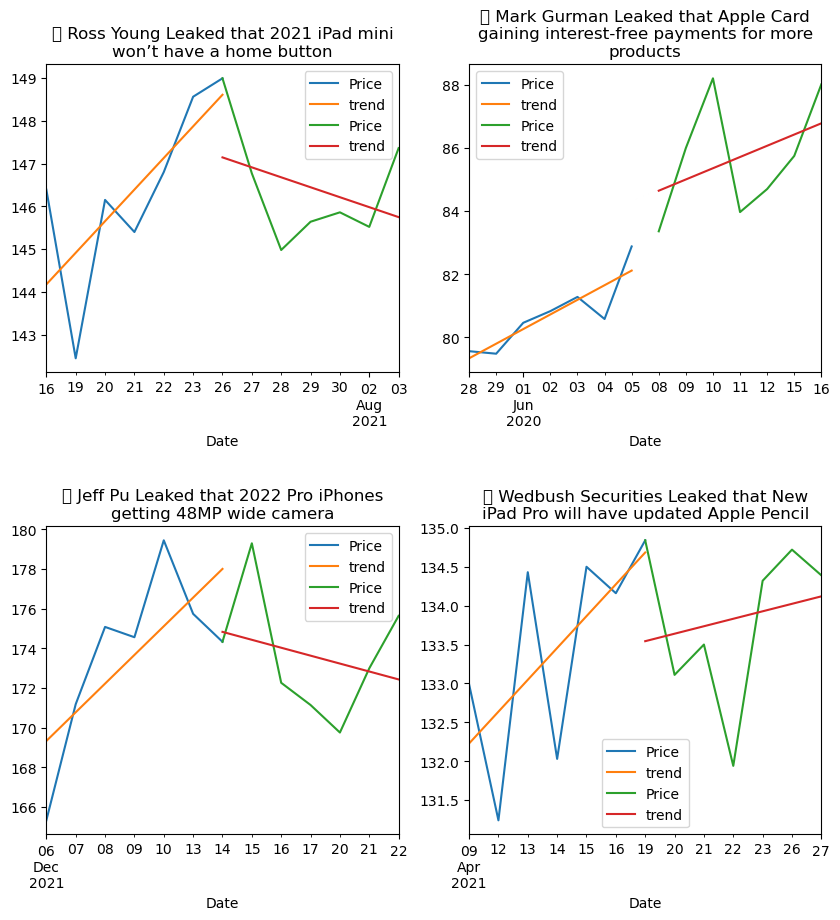

In [16]:
import textwrap
import numpy as np

lag_size = 7

# plot and calculate trend lines for 4 random examples of the 2 most accurate and 2 most inaccurate Leakers
fig, ax = plt.subplots(2,2, figsize=(10,10))

to_plot = pd.concat([samples[:2], samples[-2:]])
to_plot.reset_index(drop=True, inplace=True)
for index, row in to_plot.iterrows():
    before = filtered_stocks.loc[filtered_stocks.index <= pd.to_datetime(row.datetime)][:lag_size].sort_index().to_frame()
    after = filtered_stocks.loc[filtered_stocks.index >= pd.to_datetime(row.datetime)][-lag_size:].sort_index().to_frame()

    before, _, _ = calculate_trend(before)
    after, _, _ = calculate_trend(after)

    before.plot(ax=ax[index // 2, index % 2], y='Price')
    before.plot(ax=ax[index // 2, index % 2], y='trend')
    after.plot(ax=ax[index // 2, index % 2], y='Price')
    after.plot(ax=ax[index // 2, index % 2], y='trend')
    ax[index // 2, index % 2].set_title(textwrap.fill(f'{row.Name} Leaked that {row.Leak}', width=40))

fig.subplots_adjust(hspace=0.5)

In the plot above, four random examples of the stock behaviour around a leak is shown. The two plots at the top of the figure are leaks from a leaker with high accuracy, while the ones on the bottom are from a leaker with a small accuracy. These plots, show that the stock trend for the following week after a leak can be significantly different. For example, in the top left, the stock price had a high up-trend, whereas after the leak, it showed a strong down-trend. The same holds for the two plots at the bottom of the figure.
Another characteristic that can be observed in the figure above is, that the spacing between dates is not even, because of weekends and holidays where the stock market is closed. As a result, the effect a leak has can be delayed to the following monday, as shown in the top-right.

Before the behaviour of trends before and after a leak can be analyzed further, the corresponding slopes of the trend lines have to be added to the dataset. In order to calculate these trend lines, linear regression from the numpy module has been used.

In [17]:

# Add the slopes of the trend before and after each leak to the dataset
def compose_dataset(lag_size=7):
    slopes_before = []
    slopes_after = []
    for _, row in leaks_df.iterrows():
        before = stocks_df.loc[stocks_df.index <= pd.to_datetime(row.datetime)][:lag_size].sort_index().Price.to_frame()
        after = stocks_df.loc[stocks_df.index >= pd.to_datetime(row.datetime)][-lag_size:].sort_index().Price.to_frame()

        _, slope_before, _ = calculate_trend(before)
        _, slope_after, _ = calculate_trend(after)
        slopes_before.append(slope_before)
        slopes_after.append(slope_after)

    leaks_df['slopes_before'] = slopes_before
    leaks_df['slopes_after'] = slopes_after

compose_dataset()
leaks_df

,Name,Accuracy,Status,Leak,Leak Link,domain,datetime,slopes_before,slopes_after
0,🐟 Ross Young,92.9,⏳,Studio Display Pro will be Mini-LED,https://appletrack.com/studio-display-pro-with...,appletrack.com,2022-03-10,-1.300357,1.326071
1,🐟 Ross Young,92.9,⏳,Studio Display Pro coming in June,https://appletrack.com/studio-display-pro-with...,appletrack.com,2022-03-10,-1.300357,1.326071
2,🐟 Ross Young,92.9,⏳,20-inch iPad/MacBook hybrid coming in 2025,https://appletrack.com/apple-investigating-20-...,appletrack.com,2022-02-21,-0.368214,0.548571
3,🐟 Ross Young,92.9,⏳,iPhone Fold not coming until at least 2025,https://appletrack.com/no-foldable-iphone-unti...,appletrack.com,2022-02-21,-0.368214,0.548571
4,🐟 Ross Young,92.9,⏳,2022 iMac coming in June 2022,https://appletrack.com/revamped-imac-pro-to-la...,appletrack.com,2022-02-14,-0.688571,-1.736429
...,...,...,...,...,...,...,...,...,...
847,🌳 Wedbush Securities,45.4,✅,"AirTags will be released at April 20, 2021",https://www.macrumors.com/2021/04/19/wedbush-e...,macrumors.com,2021-04-19,0.409286,0.096071
848,🌳 Wedbush Securities,45.4,⛔️,"AirPods 3 will be teased at April 20, 2021 event",https://www.macrumors.com/2021/04/19/wedbush-e...,macrumors.com,2021-04-19,0.409286,0.096071
849,🌳 Wedbush Securities,45.4,⛔️,2020 iPhones will be announced in September,https://9to5mac.com/2020/07/13/september-launc...,9to5mac.com,2020-07-13,0.742143,0.206071
850,🌳 Wedbush Securities,45.4,✅,2020 iPhones won’t include EarPods,https://9to5mac.com/2020/06/16/apple-analyst-n...,9to5mac.com,2020-06-16,0.356071,0.544643


<AxesSubplot: title={'center': 'Number of times the sign of the slope changes after a leak'}>

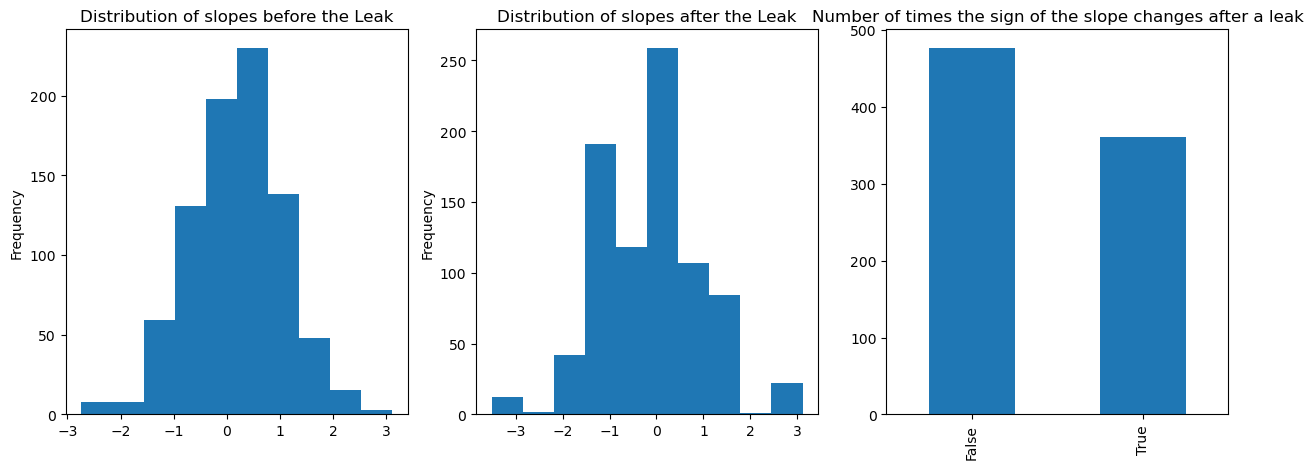

In [18]:
# Analyze the slopes before and after each leak
fig, ax = plt.subplots(1,3, figsize=(15,5))
leaks_df.slopes_before.plot(ax=ax[0], title="Distribution of slopes before the Leak", kind='hist')
leaks_df.slopes_after.plot(ax=ax[1], title="Distribution of slopes after the Leak", kind='hist')
slope_change = leaks_df.apply(lambda row: (row.slopes_before > 0 and row.slopes_after < 0) or (row.slopes_before < 0 and row.slopes_after > 0), axis=1)
slope_change.value_counts().plot.bar(ax=ax[2], title="Number of times the sign of the slope changes after a leak")

The above Figure shows three different plots. The one on the left shows the distribution of slope values before a leak, and with that represents the stock curve before a leak. The plot in the middle shows the distribution of slopes after the leak, and the plot on the right the number of times the sign of the slope changes after a leak. The distributions before the leak shows, that most slopes range from -1 to 1 with a little bit more mass towards the positive side of the x-axis. The number of trend lines with really steep slopes is rather low. The distribution of slopes after a leak, in contrast, however, is a lot more chaotic. Most slopes are either included in the bin ranging from $[0, 0.5]$ or $[-1.5,-1]$ with more mass on the negative side of the x-axis. This is hinting that a lot of sign changes might be occurring after a leak has been published or that if the stock trend was already negative, the publication of a leak resulted in an even more negative stock trend. This hypothesis is tested in the plot on the right. It can be observed that indeed, a lot of sign changes are occurring after a leak, but in most cases, the trend stays either negative or positive, but the slope might still have changed.

These insights can now be used to define five different classes, which the models should classify a leak into:
1. Neutral: The neutral class is assigned to slopes $m$ in the range of $m \in [-0.1, 0.1]$
2. Positive: The positive class is assigned to slopes $m$ in the range of $m \in [0.1, 1]$
3. Negative: The negative class is assigned to slopes $m$ in the range of $m \in [-1, -0.1]$
4. Significantly Positive: The significantly positive class is assigned to slopes $m > 1$
5. Significantly Negative: The significantly negative class is assigned to slopes $m < -1$

<AxesSubplot: title={'center': 'Distribution of classes'}>

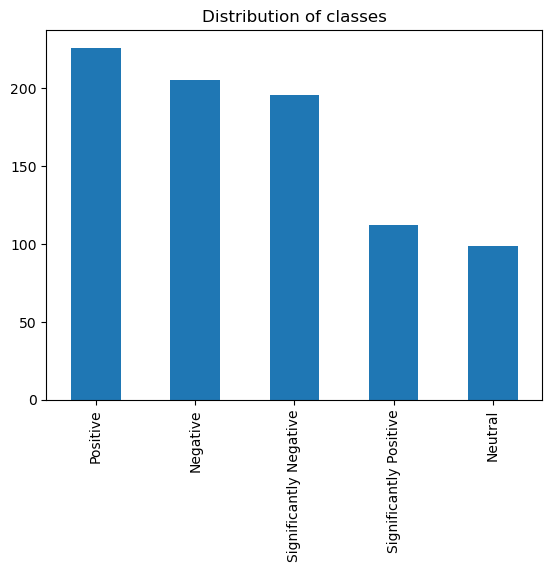

In [19]:
from utils import RangeDict

"""
Define 3/5 different classes:
1. Positive -> 0.1 < m < 1
2. Neutral -> -0.1 < m < 0.1
3. Negative -> -0.1 > m > -1
4. Significantly Positive -> m > 1
5. Significantly Negative -> m < -1
"""

# Assign classes to every leak, that capture the impact of the slope
classes = RangeDict({
    (0.1, 1): "Positive",
    (-0.1, 0.1): "Neutral",
    (-1, -0.1): "Negative",
    (1, np.inf): "Significantly Positive",
    (-np.inf, -1): "Significantly Negative"
})

leaks_df['class'] = leaks_df.slopes_after.apply(lambda x: classes[x])
leaks_df['class'].value_counts().plot.bar(title="Distribution of classes")

The distribution of these classes are shown above. It can be observed that the dataset is imbalanced, especially with regards to the significantly positive and neutral class. The other three classes are fairly balanced. These circumstances will make it harder for the model to correctly learn to classify the underrepresented classes, as there is just less training data about them. The dataset could be balanced using multiple different techniques such as oversampling (Classification on Imbalanced Data | TensorFlow Core, n.d.), is not an option because of the small amount of overall training data. Another way to balance the dataset would be to redesign the thresholds of the different classes. However, the classes should encode semantic meaning, such that a potential analyst could use the model and get meaningful assistance by the returned class. Setting the class boundaries such that all classes are balanced would contradict this constraint.

Last but not least, the stock price of the day before the leak is added to the dataset, to give the models some more financial background.

In [20]:
# Add stock price of previous day as feature
leaks_df['stock_of_prev_day'] = leaks_df.datetime.apply(lambda x: stocks_df.Price.loc[stocks_df.index <= pd.to_datetime(x)][0])
leaks_df

,Name,Accuracy,Status,Leak,Leak Link,domain,datetime,slopes_before,slopes_after,class,stock_of_prev_day
0,🐟 Ross Young,92.9,⏳,Studio Display Pro will be Mini-LED,https://appletrack.com/studio-display-pro-with...,appletrack.com,2022-03-10,-1.300357,1.326071,Significantly Positive,158.52
1,🐟 Ross Young,92.9,⏳,Studio Display Pro coming in June,https://appletrack.com/studio-display-pro-with...,appletrack.com,2022-03-10,-1.300357,1.326071,Significantly Positive,158.52
2,🐟 Ross Young,92.9,⏳,20-inch iPad/MacBook hybrid coming in 2025,https://appletrack.com/apple-investigating-20-...,appletrack.com,2022-02-21,-0.368214,0.548571,Positive,167.30
3,🐟 Ross Young,92.9,⏳,iPhone Fold not coming until at least 2025,https://appletrack.com/no-foldable-iphone-unti...,appletrack.com,2022-02-21,-0.368214,0.548571,Positive,167.30
4,🐟 Ross Young,92.9,⏳,2022 iMac coming in June 2022,https://appletrack.com/revamped-imac-pro-to-la...,appletrack.com,2022-02-14,-0.688571,-1.736429,Significantly Negative,168.88
...,...,...,...,...,...,...,...,...,...,...,...
847,🌳 Wedbush Securities,45.4,✅,"AirTags will be released at April 20, 2021",https://www.macrumors.com/2021/04/19/wedbush-e...,macrumors.com,2021-04-19,0.409286,0.096071,Neutral,134.84
848,🌳 Wedbush Securities,45.4,⛔️,"AirPods 3 will be teased at April 20, 2021 event",https://www.macrumors.com/2021/04/19/wedbush-e...,macrumors.com,2021-04-19,0.409286,0.096071,Neutral,134.84
849,🌳 Wedbush Securities,45.4,⛔️,2020 iPhones will be announced in September,https://9to5mac.com/2020/07/13/september-launc...,9to5mac.com,2020-07-13,0.742143,0.206071,Positive,95.48
850,🌳 Wedbush Securities,45.4,✅,2020 iPhones won’t include EarPods,https://9to5mac.com/2020/06/16/apple-analyst-n...,9to5mac.com,2020-06-16,0.356071,0.544643,Positive,88.02


## Model Pipeline
In this chapter, different combinations of machine and deep learning approaches are used to build a classifier which predicts the trend of the apple stock from a given leak and additional financial information, such as the slope of the trend line of the previous seven days and the stock price of the previous day.

### Zero Shot Sentiment Prediction
The first step in the model pipeline is to use a pretrained transformer-based sentiment classifier to capture the sentiment of a leak. A zero-shot setting has been chosen, as no sentiment labels for apple leaks are available. In detail, a total of three different sentiment classifiers are tested which have seen different training data:
- Twitter-roBERTa-base for Sentiment Analysis - UPDATED (2022) (Cardiffnlp/Twitter-Roberta-Base-Sentiment-Latest · Hugging Face, 2023)
- DistilBERT base uncased finetuned SST-2 (Distilbert-Base-Uncased-Finetuned-Sst-2-English · Hugging Face, 2023)
- distilRoberta-financial-sentiment (Mrm8488/Distilroberta-Finetuned-Financial-News-Sentiment-Analysis · Hugging Face, 2023)

#### Twitter-roBERTa-base for Sentiment Analysis - UPDATED (2022)
The Twitter-roBERTa-base for Sentiment Analysis - UPDATED (2022) model is a RoBERTA base model trained on 124m tweets from January 2018 to December 2021 and finetuned for sentiment analysis. It includes 3 different labels:
1. Negative
2. Neutral
3. Positive

RoBERTA-base is an unmodified BERT transformer, where different hyperparameters and training methods have been optimized to boost performance further (Liu et al., 2019). As a result, it is a bidirectional encoder only transformer, which has been trained unsupervised on masked language modelling in several different corpora (Liu et al., 2019).
As this model was pretrained on Twitter data, it should in theory fit the data quite well from a textual point of view. As a lot of data originates from tweets and tweets are short and have a length limit. Thus, the data looks quite similar. However, in terms of their domain, the texts differ significantly. Tweets from the so-called Twitter stream, which is a stream of all the latest popular tweets without any affiliation or relationships can cover any topic and can include strong keywords for sentiment prediction. Apple Leaks on the other hand, are very specific to tech domain and include a lot of domain-specific words and contexts. Some leaks require extensive domain-specific knowledge to be understood completely and to assess their impact and sentiment. Because of that, none of the three models will be an optimal candidate. But as there is no training data about the sentiment of apple leaks and transformers have been shown to work well in a zero-shot setting (Tesfagergish et al., 2022), the best model of the three will be used.

First, the dataset has to be checked for user mentions and links, as the preprocessing of twitter-roberta includes an anonymization and replacement of these text strings.

In [36]:
## Zero Shot Sentiment Prediction
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
import torch

torch.device('cpu')

print(f"Dataset contains User mentions or links: {leaks_df.Leak.apply(lambda x: bool(re.search(r'@', x)) or bool(re.search(r'http', x))).any()}")

Dataset contains User mentions or links: True


As shown above, one user mention was found, however, after further investigation it was deemed to be ignored, as it came from a leak about the inclusion of user mentions in a future version of iOS and thus needs no further processing. Now, the model can be called using the Huggingface library. First the tokenizer, and model is initialized. The texts are then tokenized and processed by the model, which returns the raw outputs from the classification head of the model. These raw outputs, also called logits are then passed through a softmax layer, returning a probability distribution over the three labels. The label with the highest probability is then assigned to the text as the predicted label.

In [23]:

# Use a roberta based sentiment classifier pre-trained on twitter data
def sentiment_twitter():

    MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"

    # Initialize model and tokenizer
    tokenizer = AutoTokenizer.from_pretrained(MODEL)
    config = AutoConfig.from_pretrained(MODEL)
    model = AutoModelForSequenceClassification.from_pretrained(MODEL)

    # retrieve model outputs
    encoded_input = tokenizer(leaks_df.Leak.to_list(), return_tensors='pt', padding=True)
    output = model(**encoded_input)
    scores = output[0].detach().numpy()
    scores = softmax(scores, axis=1)

    # retrieve the most probable label
    ranking = np.argsort(scores, axis=1)
    ranking = ranking[:, ::-1]

    return np.apply_along_axis(lambda x: config.id2label[x[0]], axis=1, arr=ranking)

leaks_df["Sentiment Twitter"] = sentiment_twitter()
leaks_df

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


,Name,Accuracy,Status,Leak,Leak Link,domain,datetime,slopes_before,slopes_after,class,stock_of_prev_day,Sentiment Twitter
0,🐟 Ross Young,92.9,⏳,Studio Display Pro will be Mini-LED,https://appletrack.com/studio-display-pro-with...,appletrack.com,2022-03-10,-1.300357,1.326071,Significantly Positive,158.52,neutral
1,🐟 Ross Young,92.9,⏳,Studio Display Pro coming in June,https://appletrack.com/studio-display-pro-with...,appletrack.com,2022-03-10,-1.300357,1.326071,Significantly Positive,158.52,neutral
2,🐟 Ross Young,92.9,⏳,20-inch iPad/MacBook hybrid coming in 2025,https://appletrack.com/apple-investigating-20-...,appletrack.com,2022-02-21,-0.368214,0.548571,Positive,167.30,neutral
3,🐟 Ross Young,92.9,⏳,iPhone Fold not coming until at least 2025,https://appletrack.com/no-foldable-iphone-unti...,appletrack.com,2022-02-21,-0.368214,0.548571,Positive,167.30,neutral
4,🐟 Ross Young,92.9,⏳,2022 iMac coming in June 2022,https://appletrack.com/revamped-imac-pro-to-la...,appletrack.com,2022-02-14,-0.688571,-1.736429,Significantly Negative,168.88,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
847,🌳 Wedbush Securities,45.4,✅,"AirTags will be released at April 20, 2021",https://www.macrumors.com/2021/04/19/wedbush-e...,macrumors.com,2021-04-19,0.409286,0.096071,Neutral,134.84,neutral
848,🌳 Wedbush Securities,45.4,⛔️,"AirPods 3 will be teased at April 20, 2021 event",https://www.macrumors.com/2021/04/19/wedbush-e...,macrumors.com,2021-04-19,0.409286,0.096071,Neutral,134.84,neutral
849,🌳 Wedbush Securities,45.4,⛔️,2020 iPhones will be announced in September,https://9to5mac.com/2020/07/13/september-launc...,9to5mac.com,2020-07-13,0.742143,0.206071,Positive,95.48,neutral
850,🌳 Wedbush Securities,45.4,✅,2020 iPhones won’t include EarPods,https://9to5mac.com/2020/06/16/apple-analyst-n...,9to5mac.com,2020-06-16,0.356071,0.544643,Positive,88.02,neutral


#### DistilBERT base uncased finetuned SST-2
DistilBERT base uncased finetuned SST-2 is a finetuned DistilBERT-base-uncased checkpoint fine-tuned on the Stanford Sentiment Treebank 2 (SST-2) Dataset. From a domain perspective, this model was fine-tuned on sentences from movie reviews. Which means they are rather short but express strong sentiments. It thus faces similar domain-specific challenges as the twitter-roberta model.
The DistilBERT-base-uncased model is a smaller, faster and distilled version of the BERT model, which was trained with BERT as a teacher or in other words, to act as a BERT model by returning the same probabilities as BERT (Sanh et al., 2019).
The implementation process is similar to twitter-roberta thanks to the huggingface library.

In [48]:

# use a distilbert uncased sentiment classifier trained on sst2
def sentiment_sst2():

    tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
    model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

    inputs = tokenizer(leaks_df.Leak.to_list(), return_tensors="pt", padding=True)
    with torch.no_grad():
        logits = model(**inputs).logits

    predicted_class_id = logits.argmax(axis=1)
    label_lookup = np.vectorize(lambda x: model.config.id2label[x])
    return label_lookup(predicted_class_id)

leaks_df["Sentiment SST2"] = sentiment_sst2()
leaks_df

,Name,Accuracy,Status,Leak,Leak Link,domain,datetime,slopes_before,slopes_after,class,stock_of_prev_day,Sentiment Twitter,Sentiment SST2
0,🐟 Ross Young,92.9,⏳,Studio Display Pro will be Mini-LED,https://appletrack.com/studio-display-pro-with...,appletrack.com,2022-03-10,-1.300357,1.326071,Significantly Positive,158.52,neutral,NEGATIVE
1,🐟 Ross Young,92.9,⏳,Studio Display Pro coming in June,https://appletrack.com/studio-display-pro-with...,appletrack.com,2022-03-10,-1.300357,1.326071,Significantly Positive,158.52,neutral,POSITIVE
2,🐟 Ross Young,92.9,⏳,20-inch iPad/MacBook hybrid coming in 2025,https://appletrack.com/apple-investigating-20-...,appletrack.com,2022-02-21,-0.368214,0.548571,Positive,167.30,neutral,POSITIVE
3,🐟 Ross Young,92.9,⏳,iPhone Fold not coming until at least 2025,https://appletrack.com/no-foldable-iphone-unti...,appletrack.com,2022-02-21,-0.368214,0.548571,Positive,167.30,neutral,NEGATIVE
4,🐟 Ross Young,92.9,⏳,2022 iMac coming in June 2022,https://appletrack.com/revamped-imac-pro-to-la...,appletrack.com,2022-02-14,-0.688571,-1.736429,Significantly Negative,168.88,neutral,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,🌳 Wedbush Securities,45.4,✅,"AirTags will be released at April 20, 2021",https://www.macrumors.com/2021/04/19/wedbush-e...,macrumors.com,2021-04-19,0.409286,0.096071,Neutral,134.84,neutral,NEGATIVE
848,🌳 Wedbush Securities,45.4,⛔️,"AirPods 3 will be teased at April 20, 2021 event",https://www.macrumors.com/2021/04/19/wedbush-e...,macrumors.com,2021-04-19,0.409286,0.096071,Neutral,134.84,neutral,POSITIVE
849,🌳 Wedbush Securities,45.4,⛔️,2020 iPhones will be announced in September,https://9to5mac.com/2020/07/13/september-launc...,9to5mac.com,2020-07-13,0.742143,0.206071,Positive,95.48,neutral,POSITIVE
850,🌳 Wedbush Securities,45.4,✅,2020 iPhones won’t include EarPods,https://9to5mac.com/2020/06/16/apple-analyst-n...,9to5mac.com,2020-06-16,0.356071,0.544643,Positive,88.02,neutral,NEGATIVE


#### distilRoberta-financial-sentiment
distilRoberta-financial-sentiment is a finetuned version of distilRoBERTA-base fine-tuned on the financial_phrasebank dataset (Mrm8488/Distilroberta-Finetuned-Financial-News-Sentiment-Analysis · Hugging Face, 2023). It thus was fine-tuned to classify the sentiment of financial news. This task is quite close from a domain perspective to the task in this work, as the sentiment of financial news is tightly connected to stock reactions. The implementation process is again similiar to twitter-roberta, as the huggingface library was used.

In [85]:
# Use a distilroberta based sentiment classifier trained on financial news
def sentiment_financial_news():
    tokenizer = AutoTokenizer.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")
    model = AutoModelForSequenceClassification.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

    inputs = tokenizer(leaks_df.Leak.to_list(), return_tensors="pt", padding=True)
    with torch.no_grad():
        logits = model(**inputs).logits

    predicted_class_id = logits.argmax(axis=1)
    label_lookup = np.vectorize(lambda x: model.config.id2label[x])
    return label_lookup(predicted_class_id)

leaks_df["Sentiment Financial News"] = sentiment_financial_news()
leaks_df

,Name,Accuracy,Status,Leak,Leak Link,domain,datetime,slopes_before,slopes_after,class,stock_of_prev_day,Sentiment Twitter,Sentiment SST2,Sentiment Financial News
0,🐟 Ross Young,92.9,⏳,Studio Display Pro will be Mini-LED,https://appletrack.com/studio-display-pro-with...,appletrack.com,2022-03-10,-1.300357,1.326071,Significantly Positive,158.52,neutral,NEGATIVE,neutral
1,🐟 Ross Young,92.9,⏳,Studio Display Pro coming in June,https://appletrack.com/studio-display-pro-with...,appletrack.com,2022-03-10,-1.300357,1.326071,Significantly Positive,158.52,neutral,POSITIVE,neutral
2,🐟 Ross Young,92.9,⏳,20-inch iPad/MacBook hybrid coming in 2025,https://appletrack.com/apple-investigating-20-...,appletrack.com,2022-02-21,-0.368214,0.548571,Positive,167.30,neutral,POSITIVE,neutral
3,🐟 Ross Young,92.9,⏳,iPhone Fold not coming until at least 2025,https://appletrack.com/no-foldable-iphone-unti...,appletrack.com,2022-02-21,-0.368214,0.548571,Positive,167.30,neutral,NEGATIVE,neutral
4,🐟 Ross Young,92.9,⏳,2022 iMac coming in June 2022,https://appletrack.com/revamped-imac-pro-to-la...,appletrack.com,2022-02-14,-0.688571,-1.736429,Significantly Negative,168.88,neutral,POSITIVE,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,🌳 Wedbush Securities,45.4,✅,"AirTags will be released at April 20, 2021",https://www.macrumors.com/2021/04/19/wedbush-e...,macrumors.com,2021-04-19,0.409286,0.096071,Neutral,134.84,neutral,NEGATIVE,neutral
848,🌳 Wedbush Securities,45.4,⛔️,"AirPods 3 will be teased at April 20, 2021 event",https://www.macrumors.com/2021/04/19/wedbush-e...,macrumors.com,2021-04-19,0.409286,0.096071,Neutral,134.84,neutral,POSITIVE,neutral
849,🌳 Wedbush Securities,45.4,⛔️,2020 iPhones will be announced in September,https://9to5mac.com/2020/07/13/september-launc...,9to5mac.com,2020-07-13,0.742143,0.206071,Positive,95.48,neutral,POSITIVE,neutral
850,🌳 Wedbush Securities,45.4,✅,2020 iPhones won’t include EarPods,https://9to5mac.com/2020/06/16/apple-analyst-n...,9to5mac.com,2020-06-16,0.356071,0.544643,Positive,88.02,neutral,NEGATIVE,neutral


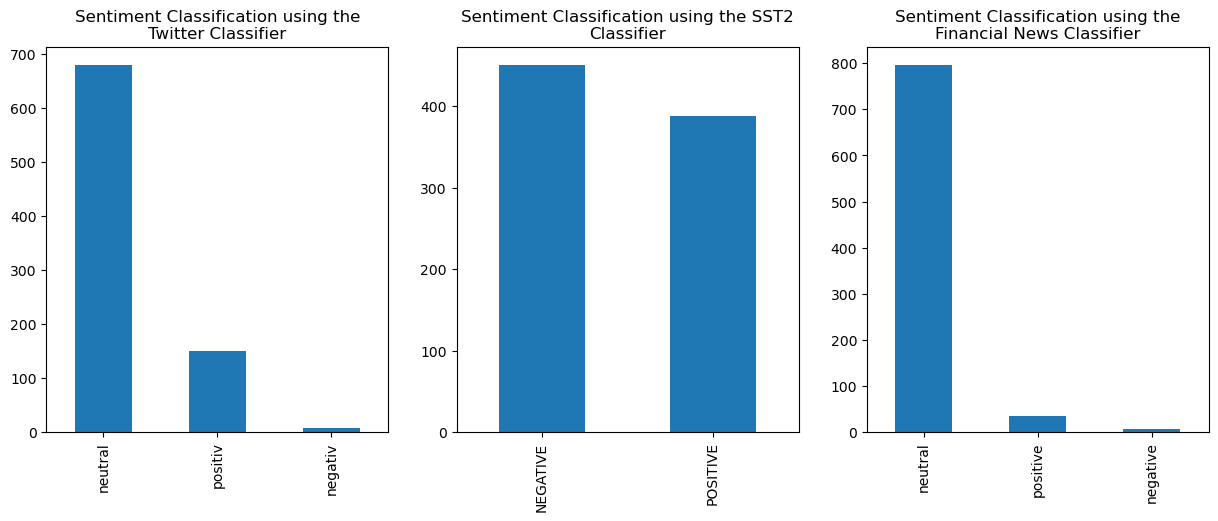

In [86]:
# PLot results of Zero-Shot application of sentiment classifiers
fig, ax = plt.subplots(1,3, figsize=(15,5))

leaks_df["Sentiment Twitter"].value_counts().plot.bar(ax=ax[0], title=textwrap.fill("Sentiment Classification using the Twitter Classifier", width=40))
leaks_df["Sentiment SST2"].value_counts().plot.bar(ax=ax[1], title=textwrap.fill("Sentiment Classification using the SST2 Classifier", width=40))
leaks_df["Sentiment Financial News"].value_counts().plot.bar(ax=ax[2], title=textwrap.fill("Sentiment Classification using the Financial News Classifier", width=40))
plt.show()

The Figure above shows the distribution of predicted labels on the Apple Leaks dataset. The models trained on Twitter and financial data both predicted mostly neutral labels, which shows that both models couldn't really get any information from the data. Instead, it just classified it as neutral as it lacked the background knowledge to properly assess the content of a leak. The SST-2 model didn't have this option and thus was forced to classify the data either as positive or negative. Interestingly, it classified most of the labels as negative. However, so far it can't be determined how well this model performed, as no sentiment labels are available.

### Sentiment Evaluation
In order to properly assess the performance of these sentiment models, randomly sampled test set of 100 leaks was manually labeled by myself. As I'm the only person to label this data, it may include unwanted biases and subjective opinions about products and features, which others might disagree with. However, it the results still give an overview about the performance of the different models and whether they are only guessing a class or whether they can actually extract the sentiment of a leak.

In [87]:
# Sample 100 Random examples to annotate manually
subset_for_evaluation = leaks_df.sample(100)
subset_for_evaluation.to_csv("datasets/evaluation.csv", index=False)

In [274]:
labeled = pd.read_csv("datasets/evaluation_labeled.csv") # Load manually annotated examples
labeled

,Name,Accuracy,Status,Leak,Leak Link,domain,datetime,slopes_before,slopes_after,class,stock_of_prev_day,Sentiment Twitter,Sentiment SST2,Sentiment Financial News,Manual Label
0,👨‍💻 Ming-Chi Kuo,72.5,⛔️,Smaller wireless charging mat coming in first ...,https://9to5mac.com/2020/01/29/kuo-forecasts-n...,9to5mac.com,29.01.20,0.116071,0.063214,Neutral,81.08,neutral,NEGATIVE,neutral,positive
1,🕘 9to5Mac,82.8,✅,watchOS 7 can share watch faces,https://9to5mac.com/2020/03/09/apple-watch-ser...,9to5mac.com,09.03.20,-0.335000,-1.103214,Significantly Negative,66.54,neutral,POSITIVE,neutral,positive
2,🏀 Mark Gurman,86.4,⏳,Future Mac will have Face ID,https://www.bloomberg.com/news/articles/2021-0...,bloomberg.com,22.01.21,1.619643,-1.527857,Significantly Negative,139.07,neutral,POSITIVE,neutral,positive
3,📱 Jeff Pu,50.0,✅,12.9-inch iPad Pro getting Mini-LED display,https://www.macrumors.com/2020/05/26/apple-min...,macrumors.com,26.05.20,0.344286,0.350000,Positive,79.18,neutral,NEGATIVE,neutral,positive
4,🕘 9to5Mac,82.8,⛔️,AirPods Max will have reversibility,https://9to5mac.com/2020/05/11/airpods-studio-...,9to5mac.com,11.05.20,1.052500,0.013929,Neutral,78.75,positiv,NEGATIVE,neutral,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,🧻 Jon Prosser,69.0,✅,2020 iPhones LiDAR sensor helps with autofocus...,https://appletrack.com/iphone-12-pro-max-scree...,appletrack.com,25.08.20,2.140000,1.395000,Significantly Positive,124.83,positiv,POSITIVE,neutral,positive
96,🏀 Mark Gurman,86.4,✅,iPadOS 15 will have redesigned Home Screen,https://www.bloomberg.com/news/articles/2021-0...,bloomberg.com,22.04.21,-0.118571,-0.152143,Negative,131.94,neutral,NEGATIVE,neutral,positive
97,🏀 Mark Gurman,86.4,✅,iOS 15 will have upgraded notifications,https://www.bloomberg.com/news/articles/2021-0...,bloomberg.com,22.04.21,-0.118571,-0.152143,Negative,131.94,positiv,NEGATIVE,neutral,positive
98,🦅 Barclays,55.6,⛔️,2021 iPhones will support Wi-Fi 6E,https://www.macrumors.com/2020/12/18/iphone-13...,macrumors.com,18.12.20,1.030000,1.488214,Significantly Positive,126.65,positiv,POSITIVE,neutral,positive


After loading the manually labeled data, the labels of the three models have to be aligned with the manually labeled classes, so that every class description and label has the same meaning for every model and can be processed accordingly. As the SST-2 model only included negative and postive labels, the neutral label of the other two models was converted to positive, as a neutral Statement can be seen as positive.

In [275]:
# Align labels
labeled["Manual Label"] = labeled["Manual Label"].str.upper()
labeled["Sentiment Twitter"] = labeled["Sentiment Twitter"].apply(lambda x: "POSITIVE" if x == "positiv" or "neutral" else "NEGATIVE")
labeled["Sentiment Financial News"] = labeled["Sentiment Financial News"].apply(lambda x: "POSITIVE" if x == "positiv" or "neutral" else "NEGATIVE")
labeled

,Name,Accuracy,Status,Leak,Leak Link,domain,datetime,slopes_before,slopes_after,class,stock_of_prev_day,Sentiment Twitter,Sentiment SST2,Sentiment Financial News,Manual Label
0,👨‍💻 Ming-Chi Kuo,72.5,⛔️,Smaller wireless charging mat coming in first ...,https://9to5mac.com/2020/01/29/kuo-forecasts-n...,9to5mac.com,29.01.20,0.116071,0.063214,Neutral,81.08,POSITIVE,NEGATIVE,POSITIVE,POSITIVE
1,🕘 9to5Mac,82.8,✅,watchOS 7 can share watch faces,https://9to5mac.com/2020/03/09/apple-watch-ser...,9to5mac.com,09.03.20,-0.335000,-1.103214,Significantly Negative,66.54,POSITIVE,POSITIVE,POSITIVE,POSITIVE
2,🏀 Mark Gurman,86.4,⏳,Future Mac will have Face ID,https://www.bloomberg.com/news/articles/2021-0...,bloomberg.com,22.01.21,1.619643,-1.527857,Significantly Negative,139.07,POSITIVE,POSITIVE,POSITIVE,POSITIVE
3,📱 Jeff Pu,50.0,✅,12.9-inch iPad Pro getting Mini-LED display,https://www.macrumors.com/2020/05/26/apple-min...,macrumors.com,26.05.20,0.344286,0.350000,Positive,79.18,POSITIVE,NEGATIVE,POSITIVE,POSITIVE
4,🕘 9to5Mac,82.8,⛔️,AirPods Max will have reversibility,https://9to5mac.com/2020/05/11/airpods-studio-...,9to5mac.com,11.05.20,1.052500,0.013929,Neutral,78.75,POSITIVE,NEGATIVE,POSITIVE,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,🧻 Jon Prosser,69.0,✅,2020 iPhones LiDAR sensor helps with autofocus...,https://appletrack.com/iphone-12-pro-max-scree...,appletrack.com,25.08.20,2.140000,1.395000,Significantly Positive,124.83,POSITIVE,POSITIVE,POSITIVE,POSITIVE
96,🏀 Mark Gurman,86.4,✅,iPadOS 15 will have redesigned Home Screen,https://www.bloomberg.com/news/articles/2021-0...,bloomberg.com,22.04.21,-0.118571,-0.152143,Negative,131.94,POSITIVE,NEGATIVE,POSITIVE,POSITIVE
97,🏀 Mark Gurman,86.4,✅,iOS 15 will have upgraded notifications,https://www.bloomberg.com/news/articles/2021-0...,bloomberg.com,22.04.21,-0.118571,-0.152143,Negative,131.94,POSITIVE,NEGATIVE,POSITIVE,POSITIVE
98,🦅 Barclays,55.6,⛔️,2021 iPhones will support Wi-Fi 6E,https://www.macrumors.com/2020/12/18/iphone-13...,macrumors.com,18.12.20,1.030000,1.488214,Significantly Positive,126.65,POSITIVE,POSITIVE,POSITIVE,POSITIVE


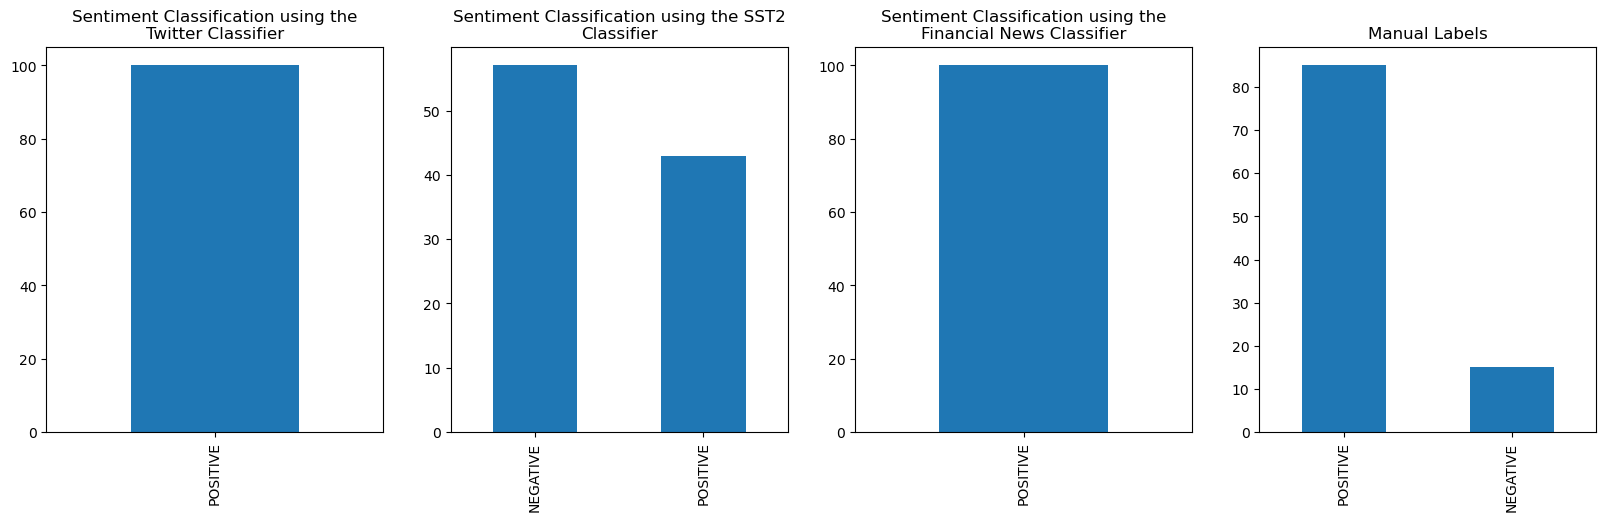

In [276]:
# Plot Evaluation results
fig, ax = plt.subplots(1,4, figsize=(20,5))

labeled["Sentiment Twitter"].value_counts().plot.bar(ax=ax[0], title=textwrap.fill("Sentiment Classification using the Twitter Classifier", width=40))
labeled["Sentiment SST2"].value_counts().plot.bar(ax=ax[1], title=textwrap.fill("Sentiment Classification using the SST2 Classifier", width=40))
labeled["Sentiment Financial News"].value_counts().plot.bar(ax=ax[2], title=textwrap.fill("Sentiment Classification using the Financial News Classifier", width=40))
labeled["Manual Label"].value_counts().plot.bar(ax=ax[3], title=textwrap.fill("Manual Labels", width=40))
plt.show()

The absolute values of the evaluation results are displayed in the Figure above. As expected, the financial and twitter based classifiers didn't perform well, as every label gets mapped to positive as they almost classify everything as neutral. Interestingly, the manual labeling process resulted in a lot of positive labels and only a small number of negative labels. However, this shows, that the SST-2 classifier might as well not perform great, as the label distribution is quite different. To further test this hypothesis and quantify model performance the F1-Score and Matthews Correlation Coefficient (MCC) are computed in the following.

<AxesSubplot: title={'center': 'Classifier performance on the evaluation subset'}, xlabel='Classifier_Name'>

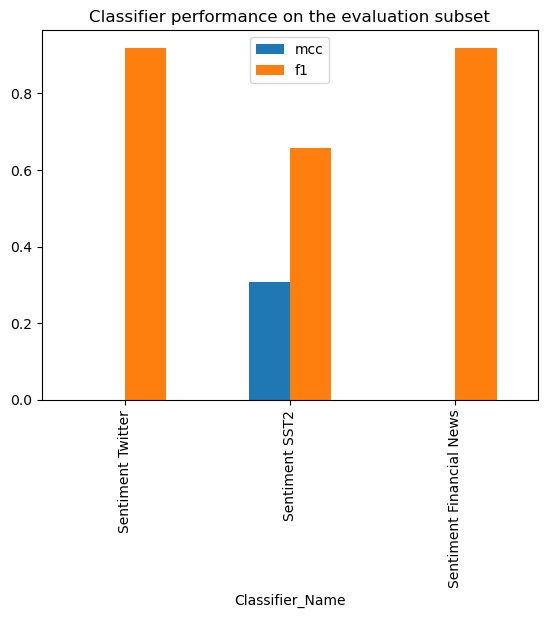

In [277]:
from sklearn.metrics import matthews_corrcoef, f1_score

# Compute MCC and F1 Score to quantify model performance
def labels_to_numeric(x):
    return 1 if x == "POSITIVE" else 0

labeled["Sentiment Twitter"] = labeled["Sentiment Twitter"].apply(labels_to_numeric)
labeled["Sentiment Financial News"] = labeled["Sentiment Financial News"].apply(labels_to_numeric)
labeled["Sentiment SST2"] = labeled["Sentiment SST2"].apply(labels_to_numeric)
labeled["Manual Label"] = labeled["Manual Label"].apply(labels_to_numeric)

pd.DataFrame(
    {
        "Classifier_Name": ["Sentiment Twitter", "Sentiment SST2", "Sentiment Financial News"],
        "mcc": [matthews_corrcoef(labeled["Manual Label"], labeled["Sentiment Twitter"]), matthews_corrcoef(labeled["Manual Label"], labeled["Sentiment SST2"]), matthews_corrcoef(labeled["Manual Label"], labeled["Sentiment Financial News"])],
        "f1": [f1_score(labeled["Manual Label"], labeled["Sentiment Twitter"]), f1_score(labeled["Manual Label"], labeled["Sentiment SST2"]), f1_score(labeled["Manual Label"], labeled["Sentiment Financial News"])]
    }).plot.bar(title="Classifier performance on the evaluation subset", x='Classifier_Name')

As expected, the MCC scores of the twitter and financial sentiment classifiers are 0, which is equal to the model guessing the class or always predicting the same class, in other words, they didn't generalize on the data. Their F1-Scores in return are very high, however, this is also expected, as the test set is highly imbalanced and thus always classifying everything in the overrepresented class results in high precision and recall scores and thus in a high F1-Score. The model fine-tuned on SST-2 performed significantly better than the other two, reaching a MCC of around 0.3, which shows that it is able to generalize on the test data, but it isn't performing very well. This is also reflected by the F1-score which is around 0.7.
As a result, the SST-2 based model will be used in order to provide the sentiment features for the classifiers. Even though this data will be noisy, it could push the classifiers in the correct direction in most cases. In addition, the deep learning based classifiers will include Dropout layers, to mitigate the effect noisy data has on their classification performance.

### Dataset for Modelling
In the next step, the dataset will be prepared to be used with machine and deep learning classifiers.

In [93]:
leaks_df

,Name,Accuracy,Status,Leak,Leak Link,domain,datetime,slopes_before,slopes_after,class,stock_of_prev_day,Sentiment Twitter,Sentiment SST2,Sentiment Financial News
0,🐟 Ross Young,92.9,⏳,Studio Display Pro will be Mini-LED,https://appletrack.com/studio-display-pro-with...,appletrack.com,2022-03-10,-1.300357,1.326071,Significantly Positive,158.52,neutral,NEGATIVE,neutral
1,🐟 Ross Young,92.9,⏳,Studio Display Pro coming in June,https://appletrack.com/studio-display-pro-with...,appletrack.com,2022-03-10,-1.300357,1.326071,Significantly Positive,158.52,neutral,POSITIVE,neutral
2,🐟 Ross Young,92.9,⏳,20-inch iPad/MacBook hybrid coming in 2025,https://appletrack.com/apple-investigating-20-...,appletrack.com,2022-02-21,-0.368214,0.548571,Positive,167.30,neutral,POSITIVE,neutral
3,🐟 Ross Young,92.9,⏳,iPhone Fold not coming until at least 2025,https://appletrack.com/no-foldable-iphone-unti...,appletrack.com,2022-02-21,-0.368214,0.548571,Positive,167.30,neutral,NEGATIVE,neutral
4,🐟 Ross Young,92.9,⏳,2022 iMac coming in June 2022,https://appletrack.com/revamped-imac-pro-to-la...,appletrack.com,2022-02-14,-0.688571,-1.736429,Significantly Negative,168.88,neutral,POSITIVE,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,🌳 Wedbush Securities,45.4,✅,"AirTags will be released at April 20, 2021",https://www.macrumors.com/2021/04/19/wedbush-e...,macrumors.com,2021-04-19,0.409286,0.096071,Neutral,134.84,neutral,NEGATIVE,neutral
848,🌳 Wedbush Securities,45.4,⛔️,"AirPods 3 will be teased at April 20, 2021 event",https://www.macrumors.com/2021/04/19/wedbush-e...,macrumors.com,2021-04-19,0.409286,0.096071,Neutral,134.84,neutral,POSITIVE,neutral
849,🌳 Wedbush Securities,45.4,⛔️,2020 iPhones will be announced in September,https://9to5mac.com/2020/07/13/september-launc...,9to5mac.com,2020-07-13,0.742143,0.206071,Positive,95.48,neutral,POSITIVE,neutral
850,🌳 Wedbush Securities,45.4,✅,2020 iPhones won’t include EarPods,https://9to5mac.com/2020/06/16/apple-analyst-n...,9to5mac.com,2020-06-16,0.356071,0.544643,Positive,88.02,neutral,NEGATIVE,neutral


First, every irrelevant column is dropped, such as the Leak Link, domain, Name of the Leaker, etc.

In [107]:
ds = leaks_df.drop(columns=["Name", "Status", "Leak Link", "domain", "datetime", "slopes_after", "Sentiment Twitter", "Sentiment Financial News"]) # remove unnecessary columns
ds

,Accuracy,Leak,slopes_before,class,stock_of_prev_day,Sentiment SST2
0,92.9,Studio Display Pro will be Mini-LED,-1.300357,Significantly Positive,158.52,NEGATIVE
1,92.9,Studio Display Pro coming in June,-1.300357,Significantly Positive,158.52,POSITIVE
2,92.9,20-inch iPad/MacBook hybrid coming in 2025,-0.368214,Positive,167.30,POSITIVE
3,92.9,iPhone Fold not coming until at least 2025,-0.368214,Positive,167.30,NEGATIVE
4,92.9,2022 iMac coming in June 2022,-0.688571,Significantly Negative,168.88,POSITIVE
...,...,...,...,...,...,...
847,45.4,"AirTags will be released at April 20, 2021",0.409286,Neutral,134.84,NEGATIVE
848,45.4,"AirPods 3 will be teased at April 20, 2021 event",0.409286,Neutral,134.84,POSITIVE
849,45.4,2020 iPhones will be announced in September,0.742143,Positive,95.48,POSITIVE
850,45.4,2020 iPhones won’t include EarPods,0.356071,Positive,88.02,NEGATIVE


Then, a sentence transformer is used, namely MiniLM-L6-v2, in order to construct a meaningful numerical semantic representation of the leaks content. MiniLM-L6-v2 was chosen in as it provides a good balance between speed and performance. Sentence Transformers are Siamese BERT based models, trained to compute meaningful sentence/text embeddings, which can be compared using cosine similarity (Reimers & Gurevych, 2019). Thus, these models are a good choice for computing meaningful text embeddings of the Leaks content.

In [108]:
from sentence_transformers import SentenceTransformer

# Add SBert embeddings to capture the meaning of the text sequence

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(ds.Leak.to_list())
ds["SBert Embeddings"] = embeddings.tolist()
ds

,Accuracy,Leak,slopes_before,class,stock_of_prev_day,Sentiment SST2,SBert Embeddings
0,92.9,Studio Display Pro will be Mini-LED,-1.300357,Significantly Positive,158.52,NEGATIVE,"[0.07338682562112808, 0.04838955029845238, 0.0..."
1,92.9,Studio Display Pro coming in June,-1.300357,Significantly Positive,158.52,POSITIVE,"[0.0021450051572173834, -0.05290606990456581, ..."
2,92.9,20-inch iPad/MacBook hybrid coming in 2025,-0.368214,Positive,167.30,POSITIVE,"[-0.010169746354222298, -0.003956621512770653,..."
3,92.9,iPhone Fold not coming until at least 2025,-0.368214,Positive,167.30,NEGATIVE,"[-0.11034642159938812, -0.0527389720082283, 0...."
4,92.9,2022 iMac coming in June 2022,-0.688571,Significantly Negative,168.88,POSITIVE,"[-0.05974789336323738, -0.01658647693693638, 0..."
...,...,...,...,...,...,...,...
847,45.4,"AirTags will be released at April 20, 2021",0.409286,Neutral,134.84,NEGATIVE,"[0.01139326486736536, -0.06309499591588974, 0...."
848,45.4,"AirPods 3 will be teased at April 20, 2021 event",0.409286,Neutral,134.84,POSITIVE,"[-0.09748359024524689, -0.07334436476230621, 0..."
849,45.4,2020 iPhones will be announced in September,0.742143,Positive,95.48,POSITIVE,"[-0.0601656436920166, -0.029494406655430794, 0..."
850,45.4,2020 iPhones won’t include EarPods,0.356071,Positive,88.02,NEGATIVE,"[-0.0030736643821001053, -0.01206380408257246,..."


Next, the text labels of the sentiment and class labels are converted to numeric representations and the accuracy score is normalized.

In [109]:
# Assign numeric representations
ds.drop(columns=["Leak"], inplace=True)
ds["Sentiment SST2"] = pd.factorize(ds["Sentiment SST2"])[0]

numeric_class_labels = {
    "Significantly Positive": 0,
    "Positive": 1,
    "Neutral": 2,
    "Negative": 3,
    "Significantly Negative": 4
}
ds["class"] = ds["class"].apply(lambda x: numeric_class_labels[x])
ds["Accuracy"] = ds["Accuracy"] / 100
ds

,Accuracy,slopes_before,class,stock_of_prev_day,Sentiment SST2,SBert Embeddings
0,0.929,-1.300357,0,158.52,0,"[0.07338682562112808, 0.04838955029845238, 0.0..."
1,0.929,-1.300357,0,158.52,1,"[0.0021450051572173834, -0.05290606990456581, ..."
2,0.929,-0.368214,1,167.30,1,"[-0.010169746354222298, -0.003956621512770653,..."
3,0.929,-0.368214,1,167.30,0,"[-0.11034642159938812, -0.0527389720082283, 0...."
4,0.929,-0.688571,4,168.88,1,"[-0.05974789336323738, -0.01658647693693638, 0..."
...,...,...,...,...,...,...
847,0.454,0.409286,2,134.84,0,"[0.01139326486736536, -0.06309499591588974, 0...."
848,0.454,0.409286,2,134.84,1,"[-0.09748359024524689, -0.07334436476230621, 0..."
849,0.454,0.742143,1,95.48,1,"[-0.0601656436920166, -0.029494406655430794, 0..."
850,0.454,0.356071,1,88.02,0,"[-0.0030736643821001053, -0.01206380408257246,..."


After that, train, test and validation splits are created. Yielding a train split of 502 samples and a test and validation split with 168 samples each.

In [113]:
from sklearn.model_selection import train_test_split
# Compose train and test splits
train, test_val = train_test_split(ds, train_size=0.6, test_size=0.4, random_state=42, shuffle=True)
test, val = train_test_split(test_val, train_size=0.5, test_size=0.5, random_state=42, shuffle=True)
train

,Accuracy,slopes_before,class,stock_of_prev_day,Sentiment SST2,SBert Embeddings
587,0.690,-1.510714,1,126.60,1,"[-0.040497537702322006, -0.07588712871074677, ..."
594,0.690,1.627143,3,121.19,1,"[0.028502974659204483, -0.08140676468610764, 0..."
269,0.864,0.678214,1,87.43,1,"[-0.01281683798879385, -0.015009185299277306, ..."
732,0.690,0.766071,2,77.53,1,"[-0.01705055870115757, 0.01462843269109726, 0...."
347,0.828,-2.736429,3,112.00,0,"[-0.10105481743812561, 0.033210813999176025, 0..."
...,...,...,...,...,...,...
74,0.864,0.108929,1,148.60,1,"[0.020171474665403366, -0.009891645982861519, ..."
117,0.864,-0.211071,1,125.89,1,"[0.04152463749051094, 0.012472872622311115, 0...."
282,0.864,-0.569286,1,68.76,0,"[0.0007027568644843996, -0.030726684257388115,..."
447,0.727,-0.335000,4,66.54,0,"[0.04419780895113945, -0.03348439186811447, 0...."


In [114]:
test

,Accuracy,slopes_before,class,stock_of_prev_day,Sentiment SST2,SBert Embeddings
668,0.690,0.660714,1,73.45,0,"[-0.03137072175741196, 0.0070799547247588634, ..."
112,0.864,-0.211071,1,125.89,1,"[-0.0738145187497139, -0.09569822996854782, -0..."
142,0.864,-0.021429,1,124.85,1,"[-0.04613616317510605, -0.09160806238651276, 0..."
81,0.864,0.374643,1,153.12,1,"[-0.027352020144462585, -0.056755438446998596,..."
434,0.727,0.409286,2,134.84,0,"[-0.010857101529836655, -0.019289547577500343,..."
...,...,...,...,...,...,...
462,0.725,0.196071,4,163.17,0,"[0.0004940792568959296, -0.03959369286894798, ..."
605,0.690,0.107857,3,116.97,0,"[-0.07078023999929428, -0.008493243716657162, ..."
55,0.864,0.310000,4,177.57,0,"[0.0052274479530751705, 0.015142208896577358, ..."
312,0.864,-0.096786,4,80.08,0,"[-0.0010991806630045176, -0.03163197636604309,..."


In [115]:
val

,Accuracy,slopes_before,class,stock_of_prev_day,Sentiment SST2,SBert Embeddings
50,0.864,0.235357,4,173.07,0,"[-0.04757590964436531, -0.034196384251117706, ..."
208,0.864,-0.555357,4,115.05,1,"[-0.0683746486902237, -0.05501126870512962, 0...."
358,0.828,-0.335000,4,66.54,1,"[-0.07973826676607132, -0.035359468311071396, ..."
344,0.828,-0.481429,2,122.54,0,"[0.03593370318412781, 0.024707065895199776, 0...."
389,0.828,-1.072500,1,61.20,1,"[0.005122668109834194, 0.004373395349830389, 0..."
...,...,...,...,...,...,...
440,0.727,0.485357,3,64.61,1,"[-0.0499938502907753, 0.010189351625740528, -0..."
649,0.690,0.267500,1,113.01,1,"[-0.06438753753900528, -0.00361658469773829, 0..."
175,0.864,0.907500,3,136.87,0,"[-0.004242500755935907, -0.04237906262278557, ..."
846,0.454,0.409286,2,134.84,1,"[0.0041114226914942265, -0.07902418822050095, ..."


Finally, the labels are sperated from the data, so that they can be processed on their own and the splits and labels are saved to disk.

In [116]:
train_labels = train["class"]
train = train.drop(columns=["class"])
test_labels = test["class"]
test = test.drop(columns=["class"])
val_labels = val["class"]
val = val.drop(columns=["class"])
train

,Accuracy,slopes_before,stock_of_prev_day,Sentiment SST2,SBert Embeddings
587,0.690,-1.510714,126.60,1,"[-0.040497537702322006, -0.07588712871074677, ..."
594,0.690,1.627143,121.19,1,"[0.028502974659204483, -0.08140676468610764, 0..."
269,0.864,0.678214,87.43,1,"[-0.01281683798879385, -0.015009185299277306, ..."
732,0.690,0.766071,77.53,1,"[-0.01705055870115757, 0.01462843269109726, 0...."
347,0.828,-2.736429,112.00,0,"[-0.10105481743812561, 0.033210813999176025, 0..."
...,...,...,...,...,...
74,0.864,0.108929,148.60,1,"[0.020171474665403366, -0.009891645982861519, ..."
117,0.864,-0.211071,125.89,1,"[0.04152463749051094, 0.012472872622311115, 0...."
282,0.864,-0.569286,68.76,0,"[0.0007027568644843996, -0.030726684257388115,..."
447,0.727,-0.335000,66.54,0,"[0.04419780895113945, -0.03348439186811447, 0...."


In [117]:
train_labels

587    1
594    3
269    1
732    2
347    3
      ..
74     1
117    1
282    1
447    4
113    1
Name: class, Length: 502, dtype: int64

In [118]:
train.to_csv("datasets/train.csv", index=False)
train_labels.to_csv("datasets/train_labels.csv", index=False)
test.to_csv("datasets/test.csv", index=False)
test_labels.to_csv("datasets/test_labels.csv", index=False)
val.to_csv("datasets/val.csv", index=False)
val_labels.to_csv("datasets/val_labels.csv", index=False)

## Classifiers
In this section, different classifiers are trained and tested on the earlier developed dataset. This will include a range of different approaches:
- 2 Machine Learning clasifiers, namely K-Nearest Neighbour and a Decision Tree
- 2 Classification Heads based on Neural Networks
- and a Transformer Classifier which only gets the raw texts of a Leak as input.

First up, the S-BERT Embeddings will be flattened and appended to their corresponding input vectors.

In [123]:
# Flatten S-BERT Embeddings, so that they are appended to the input vector
train = pd.concat([train.drop(columns=["SBert Embeddings"]), train["SBert Embeddings"].apply(pd.Series)], axis=1)
test = pd.concat([test.drop(columns=["SBert Embeddings"]), test["SBert Embeddings"].apply(pd.Series)], axis=1)
val = pd.concat([val.drop(columns=["SBert Embeddings"]), val["SBert Embeddings"].apply(pd.Series)], axis=1)

In [124]:
train

,Accuracy,slopes_before,stock_of_prev_day,Sentiment SST2,0,1,2,3,4,5,...,374,375,376,377,378,379,380,381,382,383
587,0.690,-1.510714,126.60,1,-0.040498,-0.075887,0.037235,-0.058284,0.053405,-0.009823,...,0.008104,0.070571,-0.062599,-0.017705,0.003355,0.055142,0.084279,-0.079060,0.029855,0.055447
594,0.690,1.627143,121.19,1,0.028503,-0.081407,0.000651,0.035270,0.103374,-0.058639,...,0.022349,0.010629,-0.065144,-0.049878,0.031293,0.019838,0.032177,-0.021885,-0.056669,0.088959
269,0.864,0.678214,87.43,1,-0.012817,-0.015009,-0.007217,-0.060025,-0.034438,-0.070369,...,-0.020554,-0.002278,0.119210,-0.075643,-0.013847,0.016842,0.108142,0.008055,0.002429,0.133481
732,0.690,0.766071,77.53,1,-0.017051,0.014628,0.098399,0.032627,-0.016579,-0.052934,...,0.071798,-0.050941,0.088630,0.015693,-0.082877,-0.003308,0.112225,-0.020655,-0.008420,0.092431
347,0.828,-2.736429,112.00,0,-0.101055,0.033211,0.048843,-0.024593,-0.008121,-0.017057,...,0.013481,-0.025318,-0.006503,-0.072256,0.061626,-0.002685,0.024776,-0.075658,0.038703,0.029542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.864,0.108929,148.60,1,0.020171,-0.009892,0.065492,-0.064636,0.029039,-0.047857,...,-0.018849,-0.066724,0.040451,0.004629,-0.012776,0.002801,0.055219,-0.032879,0.096747,0.030969
117,0.864,-0.211071,125.89,1,0.041525,0.012473,0.055959,-0.047686,-0.009140,0.056268,...,0.031412,0.050203,-0.083284,-0.027373,-0.024502,0.011592,0.052851,-0.005856,-0.034602,0.091103
282,0.864,-0.569286,68.76,0,0.000703,-0.030727,0.073359,-0.003158,0.031478,-0.045958,...,-0.043704,0.042375,-0.043207,-0.006482,0.014728,0.077889,0.074365,-0.079292,0.086840,0.018769
447,0.727,-0.335000,66.54,0,0.044198,-0.033484,0.078871,0.052715,-0.048028,-0.006070,...,0.064252,-0.089213,0.097505,0.011982,-0.032269,-0.004763,0.160502,-0.031810,-0.008794,-0.031170


In [133]:
train.columns = train.columns.astype(str)
test.columns = test.columns.astype(str)
val.columns = val.columns.astype(str)

Then the K-Nearest Neighbour Classifier is applied and its results are saved to memory.

In [135]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train.to_numpy(), train_labels.to_numpy())
knn_pred = knn.predict(test)
knn_pred

/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([1, 1, 1, 1, 2, 0, 4, 2, 3, 4, 2, 4, 1, 4, 4, 1, 1, 1, 0, 4, 1, 3,
       1, 4, 3, 1, 1, 4, 1, 1, 1, 0, 2, 0, 1, 4, 1, 2, 1, 1, 3, 3, 0, 1,
       1, 3, 0, 0, 3, 2, 3, 4, 3, 3, 0, 1, 1, 1, 1, 0, 4, 4, 1, 1, 2, 4,
       3, 3, 4, 3, 0, 3, 3, 4, 2, 3, 4, 1, 3, 4, 1, 3, 1, 4, 2, 0, 3, 3,
       1, 3, 0, 1, 3, 0, 4, 0, 3, 3, 1, 2, 3, 0, 3, 4, 2, 3, 0, 1, 0, 3,
       4, 0, 1, 2, 4, 3, 0, 2, 3, 4, 0, 4, 1, 1, 2, 4, 0, 3, 4, 4, 1, 1,
       1, 3, 2, 3, 3, 1, 1, 3, 4, 3, 4, 4, 2, 3, 4, 4, 4, 3, 1, 3, 1, 1,
       0, 1, 3, 4, 1, 1, 1, 0, 3, 4, 3, 4, 4, 4])

After that, the Decision Tree classifier is applied in a similar fashion. Both classifiers are run with their default hyperparameters, as they provide baselines for the following Deep Learning models.

In [136]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(train, train_labels)
dtc_pred = dtc.predict(test)
dtc_pred

array([1, 0, 2, 3, 2, 1, 4, 3, 1, 3, 0, 2, 2, 1, 4, 3, 3, 2, 4, 3, 2, 3,
       3, 4, 0, 2, 2, 2, 0, 3, 1, 0, 1, 0, 1, 4, 3, 0, 2, 3, 1, 1, 1, 4,
       2, 3, 0, 4, 2, 2, 3, 4, 3, 4, 0, 1, 1, 4, 1, 2, 1, 1, 1, 3, 3, 3,
       2, 4, 4, 4, 1, 1, 3, 2, 3, 3, 4, 2, 1, 4, 0, 3, 1, 4, 2, 2, 3, 4,
       1, 4, 1, 0, 3, 2, 0, 2, 2, 3, 4, 3, 3, 3, 3, 3, 1, 1, 4, 1, 0, 3,
       4, 2, 1, 1, 4, 1, 3, 0, 1, 4, 0, 4, 1, 1, 1, 4, 1, 3, 3, 4, 1, 1,
       1, 4, 2, 3, 1, 2, 3, 2, 4, 1, 4, 1, 1, 3, 4, 4, 4, 1, 3, 4, 3, 3,
       3, 2, 4, 1, 2, 3, 1, 3, 2, 4, 3, 4, 4, 4])

### Classification Heads
In the following section, two deep learning models will be trained and applied to the dataset. Both are based on classic Transformer Classification heads. In fact, the first classifier is a classification head from a BERT transformer. The idea here is, to use embeddings from a transformer model, in this case as discussed S-BERT, and extend it with additional domain-specific information before passing it on to the transformer classfication head. In theory, this gives the classification head more flexibility and infos to work with in order to predict the correct class, for example, could it learn on its own, which features of the input data are relevant and with that also learn to exclude financial information if it isn't relevant to achieve good classification performance. The classification head used in the following hasn't been altered and is a reconstruction of the classification head of a Bert Transformer. It uses the same architecture, a Dropout Layer, with a probability of 0.1, followed by a simple linear layer which computes the output classes based on the input features. As with transformers, this classification head returns raw logits. Thus, at inference time, an additional softmax layer is added on top of the classification head to retrieve a probability distribution of the output classes. The model is trained with a CrossEntropy loss and Adam as its optimizer for 100 Epochs. As the number of train samples is quite small, mini batches aren't needed for training.

In [171]:
import torch

# Classifier derived from a Transformer Classification Head
class TransformerClassificationHead(torch.nn.Module):

    def __init__(self):
        super(TransformerClassificationHead, self).__init__()

        self.transformer_classification_head = torch.nn.Sequential(
            torch.nn.Dropout(p=0.1),
            torch.nn.Linear(in_features=388, out_features=5, bias=True)
        )

    def forward(self, x):
        return self.transformer_classification_head(x)

In [180]:
# Convert splits to tensors
train_t = torch.tensor(train.to_numpy(), dtype=torch.float32)
train_labels_t = torch.tensor(train_labels.to_numpy(), dtype=torch.long)
test_t = torch.tensor(test.to_numpy(), dtype=torch.float32)
test_labels_t = torch.tensor(test_labels.to_numpy(), dtype=torch.long)
val_t = torch.tensor(val.to_numpy(), dtype=torch.float32)
val_labels_t = torch.tensor(val_labels.to_numpy(), dtype=torch.long)

def train_val_test(model, n_epochs):

    # Train model using CrossEntropy and Adam
    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters())

    for i in range(n_epochs):
        pred = model(train_t)
        loss = loss_fn(pred, train_labels_t)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        print(f"current train loss: {loss.item()}")

        with torch.no_grad():
            pred_val = model(val_t)
            loss_val = loss_fn(pred_val, val_labels_t)
            print(f"current val loss: {loss_val.item()}")

    # Evaluate model after every Epoch
    with torch.no_grad():
        pred = model(test_t)
        pred = pred.detach().numpy()

        scores = softmax(pred, axis=1)

        ranking = np.argsort(scores, axis=1)
        ranking = ranking[:, ::-1]
        predicted_classes = ranking[:, 0]

    print("mcc: ", matthews_corrcoef(y_true=test_labels, y_pred=predicted_classes))
    print("f1: ", f1_score(y_true=test_labels, y_pred=predicted_classes, average='weighted'))
    return predicted_classes

In [268]:
N_EPOCHS = 1000

transformer_classification_head = TransformerClassificationHead()
transformer_classification_head_pred = train_val_test(model=transformer_classification_head, n_epochs=N_EPOCHS)

current train loss: 5.6750807762146
current val loss: 6.201505184173584
current train loss: 5.594832420349121
current val loss: 6.0597968101501465
current train loss: 5.459759712219238
current val loss: 6.027064323425293
current train loss: 5.313762664794922
current val loss: 5.637156009674072
current train loss: 4.8394269943237305
current val loss: 5.563597202301025
current train loss: 5.02255916595459
current val loss: 5.483598232269287
current train loss: 4.680823802947998
current val loss: 5.131890296936035
current train loss: 4.430294513702393
current val loss: 5.144160270690918
current train loss: 4.387409687042236
current val loss: 4.793624401092529
current train loss: 4.2634100914001465
current val loss: 4.785027027130127
current train loss: 3.9821665287017822
current val loss: 4.629368782043457
current train loss: 3.918552875518799
current val loss: 4.175693511962891
current train loss: 3.794691801071167
current val loss: 4.112690448760986
current train loss: 3.565718650817871

As shown above, the classification head itself performed quite poorly, this will be discussed in more detail later on. However, because the standard head did yield poor results, it has been extended in the following, to give it more flexibility and modeling power. The classification head has been altered to include a non-linear hidden layer with a ReLU activation, that performs dimensionality expansion. Giving the classification head the power to learn non-linear relationships and to learn its own improved representations of the data. The dropout layer remains at the same position unaltered, and the linear layer, which computes the output classes also remains at the same position but has a different number of input neurons. The dimensionality of the representations after dimensionality expansion is an additional hyperparameter for the classification head.
This head is trained in the same way as the original transformer classification head, with the exception that training takes 400 Epochs.

In [196]:
# Extend Transformer Classification Head to Improve performance
class CustomClassifier(torch.nn.Module):

    def __init__(self):
        super(CustomClassifier, self).__init__()

        self.seq = torch.nn.Sequential(
            torch.nn.Dropout(),
            torch.nn.Linear(in_features=388, out_features=512, bias=True),
            torch.nn.ReLU(),
            torch.nn.Linear(in_features=512, out_features=5, bias=True),
        )

    def forward(self, x):
        return self.seq(x)

In [269]:
N_EPOCHS = 400
custom_classifier = CustomClassifier()

custom_classifier_pred = train_val_test(model=custom_classifier,  n_epochs=N_EPOCHS)

current train loss: 2.518986463546753
current val loss: 2.079204559326172
current train loss: 2.216003179550171
current val loss: 2.1141467094421387
current train loss: 2.2431142330169678
current val loss: 2.2629666328430176
current train loss: 2.1564598083496094
current val loss: 2.2302064895629883
current train loss: 2.211427927017212
current val loss: 2.0621144771575928
current train loss: 2.2169315814971924
current val loss: 2.177304983139038
current train loss: 2.109814405441284
current val loss: 2.067136764526367
current train loss: 2.107774019241333
current val loss: 2.112100839614868
current train loss: 1.888607144355774
current val loss: 2.178030252456665
current train loss: 2.045522689819336
current val loss: 1.9830371141433716
current train loss: 2.0227906703948975
current val loss: 1.9519304037094116
current train loss: 1.8953797817230225
current val loss: 2.0709030628204346
current train loss: 1.913156509399414
current val loss: 2.0144598484039307
current train loss: 1.914

### Transformer Classifier
Last but not Least, a Bert-base-uncased Transformer Classifier is implemented, which aims to predict the stock trends based solely on the raw text data of a leak. First, the dataset has to be transformed into a torch Dataset by defining a custom MapDataset, which maps ids to dataitems. The following class expects the data to be already processed by the corresponding tokenizer of the model. This ensures, that the tokenizer can process every sample in parrallel instead of processing every batch individually.

In [254]:
from torch.utils.data import Dataset

# Create Apple Leaks Pytorch Map-Dataset, which takes a tokenized split and its labels
class AppleLeaksDataset(Dataset):

    def __init__(self, split: dict, labels):
        self.labels = labels
        self.input_ids = split['input_ids']
        self.attention_mask = split['attention_mask']
        self.token_type_ids = split['token_type_ids']

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_mask[idx],
            'token_type_ids': self.token_type_ids[idx],
            'labels': self.labels[idx]
        }

In [263]:
# Create splits for transformer training and evaluation
transformer_ds = leaks_df.drop(columns=["Name", "Status", "Leak Link", "domain", "datetime", "slopes_after", "Sentiment Twitter", "Sentiment Financial News", "Accuracy", "slopes_before", "stock_of_prev_day", "Sentiment SST2"])
train_trans, test_val_trans = train_test_split(transformer_ds, train_size=0.6, test_size=0.4, random_state=42, shuffle=True)
test_trans, val_trans = train_test_split(test_val_trans, train_size=0.5, test_size=0.5, random_state=42, shuffle=True)

train_labels_trans = train_trans["class"]
train_trans = train_trans.drop(columns=["class"])
test_labels_trans = test_trans["class"]
test_trans = test_trans.drop(columns=["class"])
val_labels_trans = val_trans["class"]
val_trans = val_trans.drop(columns=["class"])
train_trans

,Leak
587,New iPad Pro coming in March 2021
594,AirTags coming in November 2020
269,Apple AR/VR headset will have “ultra-high-reso...
732,2020 iPhones Smart HDR better noise reduction ...
347,iOS 14 references “Apple One” name and bundle
...,...
74,Apple Glass will be Tim Cook’s final product a...
117,2021 iPad mini will launch near the end of the...
282,Apple silicon will first appear in new laptop
447,iOS 14 Messages can mark messages as unread


After defining the torch dataset, the model and datasets can be initialized. As the compute power of the M1pro chip in my laptop is quite limited, I decided to try out and use a new fine-tuning method of transformers called Low-Rank Adaption (LoRA). LoRA is a parameter efficient fine-tuning technique, that is based on the hypothesis that the change in weights during model adaption has a low "intrinsic rank" (Hu et al., 2021). Instead of fine-tuning the model directly, LoRA trains dense layers of a model indirectly by optimizing rank decomposition matrices of the dense layers' change ($A$, $B$), while keeping the pre-trained weights frozen. More formally, LoRA models (Hu et al., 2021):
$$ W_0 + \Delta W = W_0 + BA, \text{ where } W_0\in \mathbb{R}^{d\times k}, A\in \mathbb{R}^{d\times r}, B\in \mathbb{R}^{r\times k}, r << min(d,k)$$.
During training, $W_0$ is frozen, while $A, B$ contain trainable parameters. The forward pass of the model is then modified as follows (Hu et al., 2021):
$$h = W_0x + BAx$$.
Hu et al. testing showed, that even a low rank such as $r=1$ is sufficient to achieve competitive results as with full fine-tuning. They were also able to show, that LoRA roughly converges to training the original model if the number of trainable parameters increases (Hu et al., 2021). With this technique, LoRA is able to lower the hardware barrier for model training by up to three times. In the case of BERT-base, LoRA only optimizes around 0.2% of learnable parameters compared to the full model, as shown below.
If applied to transformers, LoRA is only used in the self-attention mechanism of the model in order to approximate the weight change of the Query, Key and Value linear projections. The feed-forward network, which models non-linear relationships and performs dimensionality expansion, is frozen and stays unoptimized, this was done for simplicity and parameter-efficiency (Hu et al., 2021). However, even with that limitation, LoRA was shown to be competitive with full fine-tuning, in some cases even resulting in slightly better performance.

In order to implement Bert-base-uncased using LoRA, the peft library is needed, which extends huggingface with several parameter efficient fine tuning methods, including LoRA. First, the hyperparameters for training are defined and the LoRA config to train a sequence classification model is loaded.

In [264]:
from peft import (
    get_peft_config,
    get_peft_model,
    get_peft_model_state_dict,
    set_peft_model_state_dict,
    LoraConfig,
    PeftType,
    PrefixTuningConfig,
    PromptEncoderConfig,
)
from torch.utils.data import DataLoader
from transformers import AutoModelForSequenceClassification, AutoTokenizer, get_linear_schedule_with_warmup, set_seed
from tqdm import tqdm

# define hyperparameters
batch_size=32
model_name = "bert-base-uncased"
peft_type= PeftType.LORA
device='mps'
num_epochs=40

# Load config for LoRA Fine-Tuning for Sequence Classification
peft_config = LoraConfig(task_type="SEQ_CLS", inference_mode=False, r=8, lora_alpha=16, lora_dropout=0.1)
lr = 3e-4

# Tokenize splits and create datasets and dataloaders
tokenizer = AutoTokenizer.from_pretrained(model_name)

train_trans = train_trans.Leak
test_trans = test_trans.Leak
val_trans = val_trans.Leak

train_trans_tok = tokenizer(train_trans.to_list() ,padding=True, return_tensors='pt')
test_trans_tok = tokenizer(test_trans.to_list() ,padding=True, return_tensors='pt')
val_trans_tok = tokenizer(val_trans.to_list() ,padding=True, return_tensors='pt')

train_ds = AppleLeaksDataset(split=train_trans_tok, labels=train_labels.to_list())
test_ds = AppleLeaksDataset(split=test_trans_tok, labels=test_labels.to_list())
val_ds = AppleLeaksDataset(split=val_trans_tok, labels=train_labels.to_list())
train_dl = DataLoader(train_ds, shuffle=True, batch_size=batch_size)
test_dl = DataLoader(train_ds, shuffle=True, batch_size=batch_size)
val_dl = DataLoader(train_ds, shuffle=True, batch_size=batch_size)

Then, the huggingface model of bert-base-uncased is initialized and the LoRA matrices are patched onto the model using the get_peft_model method.

In [265]:
# Initialize model and patch LoRA into the original Transformer
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=5)
model = get_peft_model(model, peft_config)
model.print_trainable_parameters()
model

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

trainable params: 302602 || all params: 109784842 || trainable%: 0.27563185817583086


PeftModelForSequenceClassification(
  (base_model): LoraModel(
    (model): BertForSequenceClassification(
      (bert): BertModel(
        (embeddings): BertEmbeddings(
          (word_embeddings): Embedding(30522, 768, padding_idx=0)
          (position_embeddings): Embedding(512, 768)
          (token_type_embeddings): Embedding(2, 768)
          (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (encoder): BertEncoder(
          (layer): ModuleList(
            (0): BertLayer(
              (attention): BertAttention(
                (self): BertSelfAttention(
                  (query): Linear(
                    in_features=768, out_features=768, bias=True
                    (lora_dropout): ModuleDict(
                      (default): Dropout(p=0.1, inplace=False)
                    )
                    (lora_A): ModuleDict(
                      (default): Linear(in_features=768, out_features

Then the training loop can be implemented. In order to train bert with LoRA, the AdamW optimizer, along with a linear learning rate scheduler with warmup is used. The training loop itself needs no special modifications compared to training a normal Huggingface transformer with pytorch. In order to keep an eye on overfitting, a validation step has been added after every epoch.

In [266]:
# Define optimizer and Learning Rate Scheduler
optimizer = torch.optim.AdamW(params=model.parameters(), lr=lr)

lr_scheduler = get_linear_schedule_with_warmup(
    optimizer=optimizer,
    num_warmup_steps=0.06 * (len(train_dl) * num_epochs),
    num_training_steps=(len(train_dl) * num_epochs)
)

# Train model
model.to(device)
for epoch in range(num_epochs):
    model.train()
    for step, batch in enumerate(tqdm(train_dl)):
        batch = {key: tensor.to(device) for key, tensor in batch.items()} # send everything to GPU
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

    # Evaluate model after every Epoch
    model.eval()
    mccs = []
    f1s = []
    for step, batch in enumerate(tqdm(val_dl)):
        batch = {key: tensor.to(device) for key, tensor in batch.items()}
        with torch.no_grad():
            outputs = model(**batch)
        predictions = outputs.logits.argmax(dim=-1)
        predictions, references = predictions, batch['labels']
        predictions = predictions.detach().cpu().numpy()
        references = references.detach().cpu().numpy()

        mccs.append(matthews_corrcoef(y_true=references, y_pred=predictions))
        f1s.append(f1_score(y_true=references, y_pred=predictions, average='weighted'))

    print(f"mcc: {np.array(mccs).mean()}")
    print(f"f1: {np.array(f1s).mean()}")


100%|██████████| 16/16 [00:01<00:00, 13.02it/s]


mcc: 0.012517340861547488
f1: 0.1514473190169195


100%|██████████| 16/16 [00:01<00:00, 13.29it/s]


mcc: 0.032428561773128584
f1: 0.18879237482273561


100%|██████████| 16/16 [00:01<00:00, 13.32it/s]


mcc: 0.013705553778506116
f1: 0.14411494605113995


100%|██████████| 16/16 [00:01<00:00, 13.37it/s]


mcc: 0.04436154309907583
f1: 0.19068368961377924


100%|██████████| 16/16 [00:01<00:00, 13.21it/s]


mcc: 0.14430512004278215
f1: 0.28295685451896374


100%|██████████| 16/16 [00:01<00:00, 13.23it/s]


mcc: 0.15276278267889726
f1: 0.26085957343438637


100%|██████████| 16/16 [00:01<00:00, 13.33it/s]


mcc: 0.2393815049584147
f1: 0.3667227237847873


100%|██████████| 16/16 [00:01<00:00, 13.19it/s]


mcc: 0.26997595167345434
f1: 0.3904608004139178


100%|██████████| 16/16 [00:01<00:00, 13.28it/s]


mcc: 0.2922677183877382
f1: 0.4093596819827031


100%|██████████| 16/16 [00:01<00:00, 13.51it/s]


mcc: 0.3682441210234252
f1: 0.4772311513348605


100%|██████████| 16/16 [00:01<00:00, 13.49it/s]


mcc: 0.37508176852138
f1: 0.4992523822650914


100%|██████████| 16/16 [00:01<00:00, 13.52it/s]


mcc: 0.4015401584002344
f1: 0.5197492952540493


100%|██████████| 16/16 [00:01<00:00, 13.41it/s]


mcc: 0.45533972554994195
f1: 0.5611918620697655


100%|██████████| 16/16 [00:01<00:00, 13.31it/s]


mcc: 0.4287170040157125
f1: 0.5403915570748449


100%|██████████| 16/16 [00:01<00:00, 13.20it/s]


mcc: 0.4509908120196806
f1: 0.550200912368881


100%|██████████| 16/16 [00:01<00:00, 13.41it/s]


mcc: 0.5701024415219242
f1: 0.6574930455699128


100%|██████████| 16/16 [00:01<00:00, 13.56it/s]


mcc: 0.575710290339339
f1: 0.6659784137526623


100%|██████████| 16/16 [00:01<00:00, 13.47it/s]


mcc: 0.5582633165820232
f1: 0.6489565330382014


100%|██████████| 16/16 [00:01<00:00, 13.49it/s]


mcc: 0.6341325838059693
f1: 0.7108189919589726


100%|██████████| 16/16 [00:01<00:00, 13.45it/s]


mcc: 0.6729988111168166
f1: 0.7439994776062899


100%|██████████| 16/16 [00:01<00:00, 13.40it/s]


mcc: 0.6896933321154248
f1: 0.7557677192067849


100%|██████████| 16/16 [00:01<00:00, 13.37it/s]


mcc: 0.7033131513423205
f1: 0.7650875506629092


100%|██████████| 16/16 [00:01<00:00, 13.42it/s]


mcc: 0.7190515381594433
f1: 0.7801079863229505


100%|██████████| 16/16 [00:01<00:00, 13.34it/s]


mcc: 0.7396228105962974
f1: 0.7954713933265696


100%|██████████| 16/16 [00:01<00:00, 13.38it/s]


mcc: 0.7295619239718382
f1: 0.7819507487590799


100%|██████████| 16/16 [00:01<00:00, 13.41it/s]


mcc: 0.7614930552769843
f1: 0.8096828637093768


100%|██████████| 16/16 [00:01<00:00, 13.21it/s]


mcc: 0.7978252731846625
f1: 0.8461060879570754


100%|██████████| 16/16 [00:01<00:00, 13.35it/s]


mcc: 0.805397065137897
f1: 0.8459201205907065


100%|██████████| 16/16 [00:01<00:00, 13.46it/s]


mcc: 0.8096235963436335
f1: 0.853950229977783


100%|██████████| 16/16 [00:01<00:00, 13.34it/s]


mcc: 0.8138659711019949
f1: 0.8546129920838393


100%|██████████| 16/16 [00:01<00:00, 13.23it/s]


mcc: 0.8143769902724742
f1: 0.8541938382485956


100%|██████████| 16/16 [00:01<00:00, 13.29it/s]


mcc: 0.8320236773334571
f1: 0.8688676679136298


100%|██████████| 16/16 [00:01<00:00, 13.39it/s]


mcc: 0.8543379663402142
f1: 0.887694419046617


100%|██████████| 16/16 [00:01<00:00, 13.42it/s]


mcc: 0.8336876898934718
f1: 0.8692327684668775


100%|██████████| 16/16 [00:01<00:00, 13.29it/s]


mcc: 0.8314269146215407
f1: 0.8644044870310104


100%|██████████| 16/16 [00:01<00:00, 13.39it/s]


mcc: 0.8463864046722405
f1: 0.8779976908259624


100%|██████████| 16/16 [00:01<00:00, 13.29it/s]


mcc: 0.8589963356116506
f1: 0.8901154277400003


100%|██████████| 16/16 [00:01<00:00, 13.30it/s]


mcc: 0.8516105454972229
f1: 0.8844882050022089


100%|██████████| 16/16 [00:01<00:00, 13.38it/s]


mcc: 0.8517043848938133
f1: 0.8840253956665951


100%|██████████| 16/16 [00:01<00:00, 13.06it/s]

mcc: 0.852132982759034
f1: 0.8826078822936286


Thanks to LoRA, the Bert-transformer could be trained in a couple minutes instead of hours. Simultaneously, the results are looking very promising. However, as these are validation scores, the transformer still needs to be evaluated on the test set, which is done below.

In [267]:
mccs = []
f1s = []
# Evaluate model on Test set
model.eval()
for step, batch in enumerate(tqdm(test_dl)):
    batch = {key: tensor.to(device) for key, tensor in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)
    predictions = outputs.logits.argmax(dim=-1)
    predictions, references = predictions, batch['labels']
    predictions = predictions.detach().cpu().numpy()
    references = references.detach().cpu().numpy()

    mccs.append(matthews_corrcoef(y_true=references, y_pred=predictions))
    f1s.append(f1_score(y_true=references, y_pred=predictions, average='weighted'))

mcc_transformer = np.array(mccs).mean()
f1_transformer = np.array(f1s).mean()
print(f"mcc: {mcc_transformer}")
print(f"f1: {f1_transformer}")

100%|██████████| 16/16 [00:02<00:00,  7.06it/s]

mcc: 0.8550105407581627
f1: 0.8837115690115823


## Evaluation
In the following, the results of the different classifiers are compared and discussed.

<AxesSubplot: xlabel='models'>

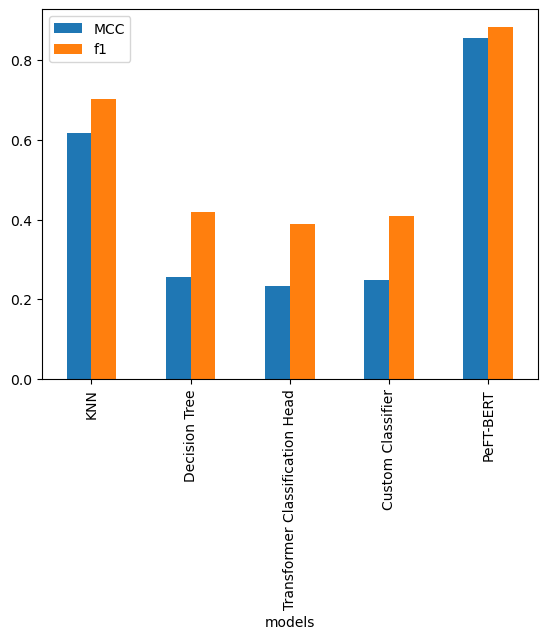

In [272]:
# Compose classifier comparison
eval_df = pd.DataFrame({
    "models": ["KNN", "Decision Tree", "Transformer Classification Head", "Custom Classifier", "PeFT-BERT"],
    "MCC": [
        matthews_corrcoef(y_true=test_labels, y_pred=knn_pred),
        matthews_corrcoef(y_true=test_labels, y_pred=dtc_pred),
        matthews_corrcoef(y_true=test_labels, y_pred=transformer_classification_head_pred),
        matthews_corrcoef(y_true=test_labels, y_pred=custom_classifier_pred),
        mcc_transformer
    ],
    "f1": [
        f1_score(y_true=test_labels, y_pred=knn_pred, average='weighted'),
        f1_score(y_true=test_labels, y_pred=dtc_pred, average='weighted'),
        f1_score(y_true=test_labels, y_pred=transformer_classification_head_pred, average='weighted'),
        f1_score(y_true=test_labels, y_pred=custom_classifier_pred, average='weighted'),
        f1_transformer
    ]
})
eval_df.plot(kind='bar', x='models')

The MCC and F1-Scores of the different classifiers are depicted in the Figure above. The classification heads and Decision Tree performed very similar, reaching an MCC of around 0.25 and an F1-Score of around 0.4, showing that all three models didn't generalize well and couldn't model meaningful dependencies between the leaks and financial data and the trend classes. Interestingly, the KNN model performed quite well, it achieved an MCC of over 0.6 and an F1-score of around 0.7. This shows, that there is a dependency between the leaks and the trend of the apple stock after the leak. As most of the input to the classifier consists of sentence transformer embeddings, which also have a good parametrized embedding space, it is very likely, that Leaks with similar sentence transformer embeddings belong to similar trend classes. This hypothesis can be tested by running a KNN classifier solely on sentence transformer embeddings, I will leave this for future work. However, supporting this hypothesis is the good performance of the BERT transformer, which has been trained with LoRA. It reached an MCC and F1-Score of over 0.8, outperforming every other model, even though it only got the raw textual description of the leaks as inputs. This supports the hypothesis that the KNN might gain most of its performance from the transformer embeddings. Additionally, it shows that there is a strong connection between the content of a leak and the trend of the apple stock in the following week, as no financial data is necessary to predict the trend with high accuracy.

## Conclusion
In this work, a new dataset consisting of apple leaks and apple stocks data has been developed in order to train machine and deep learning classifiers to predict the stock trends of the Apple Inc. stocks from leaks and rumors. First the Apple Leaks dataset has been extended by the publishing dates of the Leaks using different webscraping and scraping obfuscation techniques, most notably request monitoring, headless browser automation and automatic VPN switching. Then, the statistical characteristics of the Apple stock have been analyzed in order to find the most suitable lag size to compute trend lines and their slopes to further extend the Apple Leaks dataset with financial information. Then, different sentiment classification models have been tested in a zero-shot setting in order to find a suitable model to provide sentiment information to the classifiers. Unfortunately, these models performed poorly, with only the sentiment classifier trained on SST-2 yielding any usable results. After that, textual descriptions of the leaks have been embedded using sentence transformers, yielding powerful textual embeddings, that classifiers can use in order to represent the contents of the leaks. Then, two machine learning classifiers have been applied to the dataset, namely a K-Nearest Neighbour classifier and a Decision Tree classifier. After that, a transformer classification head was used and extended to further extend its modeling capabilities to non-linear relationships and more powerful hidden representations. Last but not least, a bert-base model was fine-tuned using LoRA, a parameter efficient fine-tuning technique, which was key to be able to run the training on device. This model only got raw textual descriptions of the leaks as input. Finally, the MCC and F1-Scores of the different classifiers were discussed during model evaluation. Showing that the Bert transformer performed the best, even though it didn't have access to any financial information. It was closely followed by the K-Nearest Neighbour classifier, although this model had access to financial info, it was hypothesised, that its performance mainly came from the well parametrized embedding space of the sentence transformer embeddings, and that the financial data is perceived as noise. Testing this hypothesis is left to future research. In summary, the results showed, that there is a strong connection between the content of a leak and the stock trend of the following week.